<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/EDA%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 1.	Data Cleaning and Preparation:
# ●	Load the dataset into a DataFrame or equivalent data structure.
# ●	Handle missing values appropriately (e.g., imputation, deletion).
# ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
# ●	Detect and treat outliers if necessary.

import pandas as pd

# Load the dataset
df = pd.read_csv('Cardiotocographic.csv') # Replace 'your_dataset.csv' with the actual filename

# 1. Handle missing values (example: fill with mean for numerical columns, mode for categorical)
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col].fillna(df[col].mean(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True) # .mode() can return multiple values, take the first

# 2. Identify and correct inconsistencies in data types (example: convert a column to numeric)
# Check data types
print("Initial data types:\n", df.dtypes)

# Example: If 'some_numeric_column' is stored as object, convert it
# df['some_numeric_column'] = pd.to_numeric(df['some_numeric_column'], errors='coerce')
# If 'errors='coerce'', invalid parsing will be set as NaN, which you might need to handle again

# 3. Detect and treat outliers (example: using Z-score for numerical columns)
from scipy.stats import zscore
import numpy as np

# Example: For a specific numerical column 'numerical_column_for_outlier_detection'
# z_scores = np.abs(zscore(df['numerical_column_for_outlier_detection']))
# threshold = 3 # Common threshold for Z-score
# outliers = df[z_scores > threshold]
# print(f"Outliers found in 'numerical_column_for_outlier_detection':\n", outliers)

# Example: Remove outliers (be cautious with this approach, consider other methods)
# df_cleaned = df[(z_scores <= threshold)]

# Another common method is IQR (Interquartile Range)
# Q1 = df['numerical_column'].quantile(0.25)
# Q3 = df['numerical_column'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_cleaned = df[(df['numerical_column'] >= lower_bound) & (df['numerical_column'] <= upper_bound)]

# Display cleaned data info
print("\nData info after cleaning and preparation:\n")
df.info()
print("\nFirst 5 rows of the cleaned data:\n", df.head())

<ipython-input-1-d1e5fe1dd9e3>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Initial data types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Data info after cleaning and preparation:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-nul

In [2]:
# prompt: 2.	Statistical Summary:
# ●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
# ●	Highlight any interesting findings from this summary

# 2. Statistical Summary
print("\nStatistical Summary of the dataset:")
print(df.describe())

# Highlight interesting findings (example observations you might look for)
# - Are the means and medians similar, suggesting a symmetric distribution?
# - Is the standard deviation large relative to the mean, indicating high variability?
# - Are there large differences between the max value and the 75th percentile, or min value and 25th percentile, potentially indicating outliers (even if not removed)?
# - Are the ranges (min to max) reasonable for the variables?

print("\nInteresting findings from the statistical summary:")
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        print(f"\nVariable: {col}")
        print(f"  Mean: {mean_val:.2f}, Median: {median_val:.2f}")
        print(f"  Standard Deviation: {std_val:.2f}")
        print(f"  Interquartile Range (IQR): {iqr:.2f}")

        # Example comparisons for interesting findings
        if abs(mean_val - median_val) > 0.1 * std_val: # Simple check for skewness
             print(f"  Note: Mean and Median are significantly different, suggesting potential skewness.")

        if std_val > mean_val: # Simple check for high variability
             print(f"  Note: Standard Deviation is larger than the Mean, indicating high variability.")

        # Check for potential outliers based on IQR bounds (even if not removed earlier)
        lower_bound_iqr = q1 - 1.5 * iqr
        upper_bound_iqr = q3 + 1.5 * iqr
        if (df[col].min() < lower_bound_iqr) or (df[col].max() > upper_bound_iqr):
             print(f"  Note: Minimum or Maximum value falls outside the typical range based on IQR, potentially indicating outliers.")


Statistical Summary of the dataset:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   



Visualizing Data:

Creating Histograms and Boxplots for Numerical Variables:


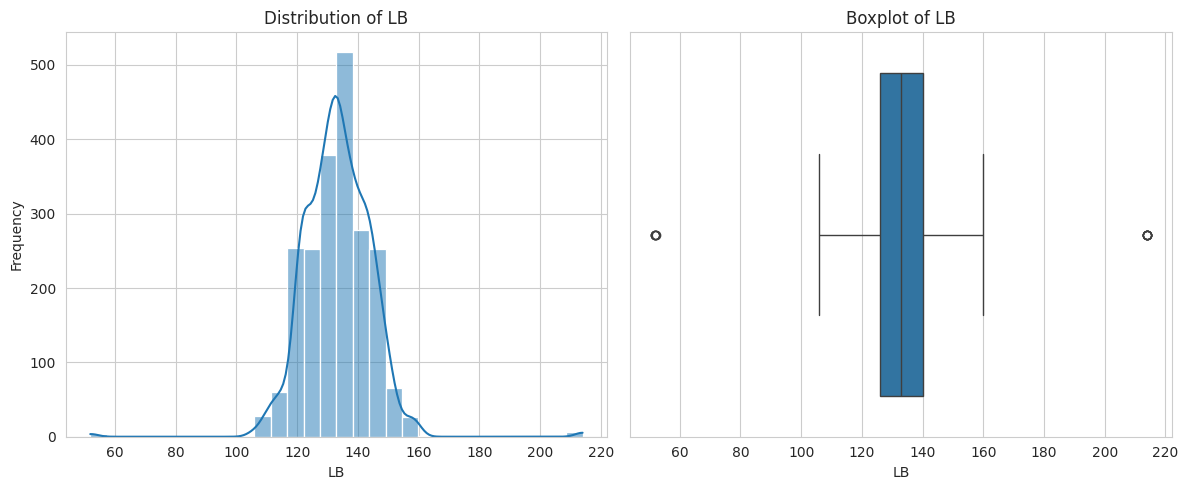

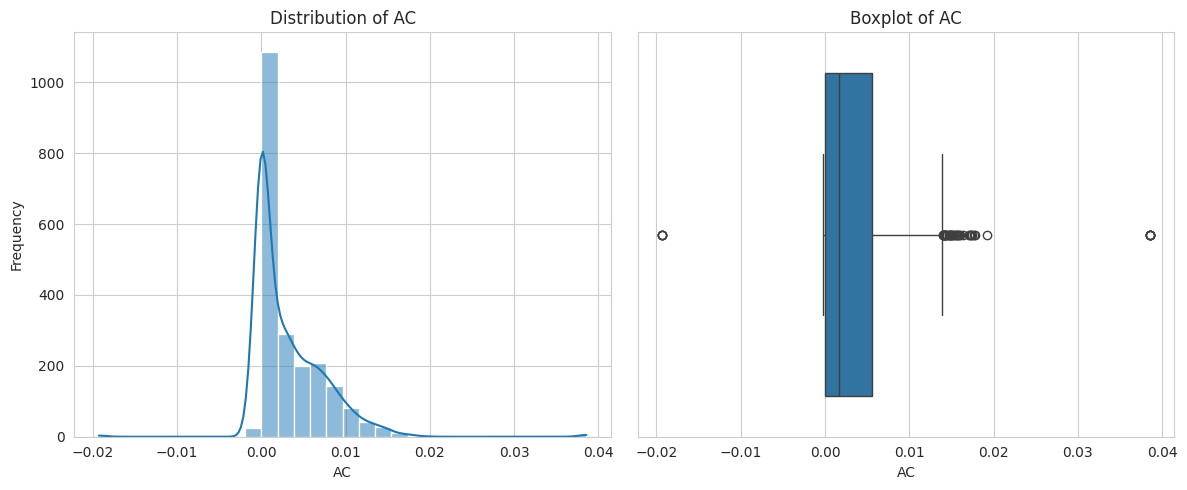

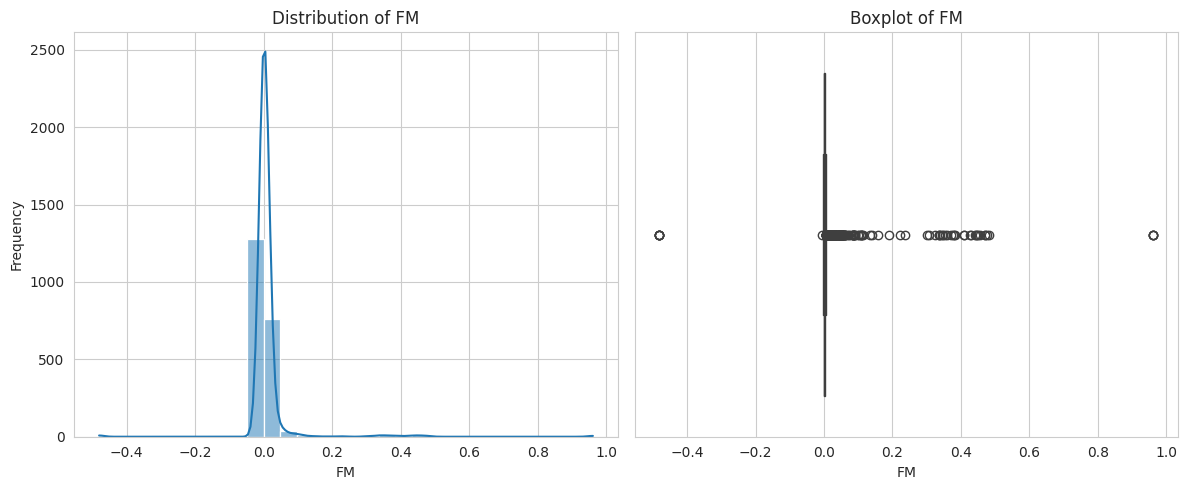

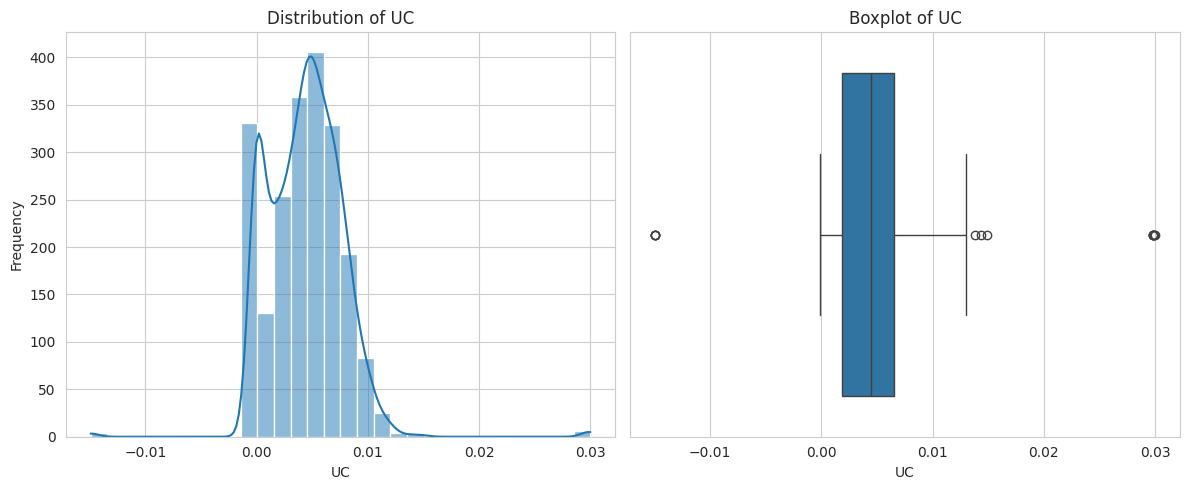

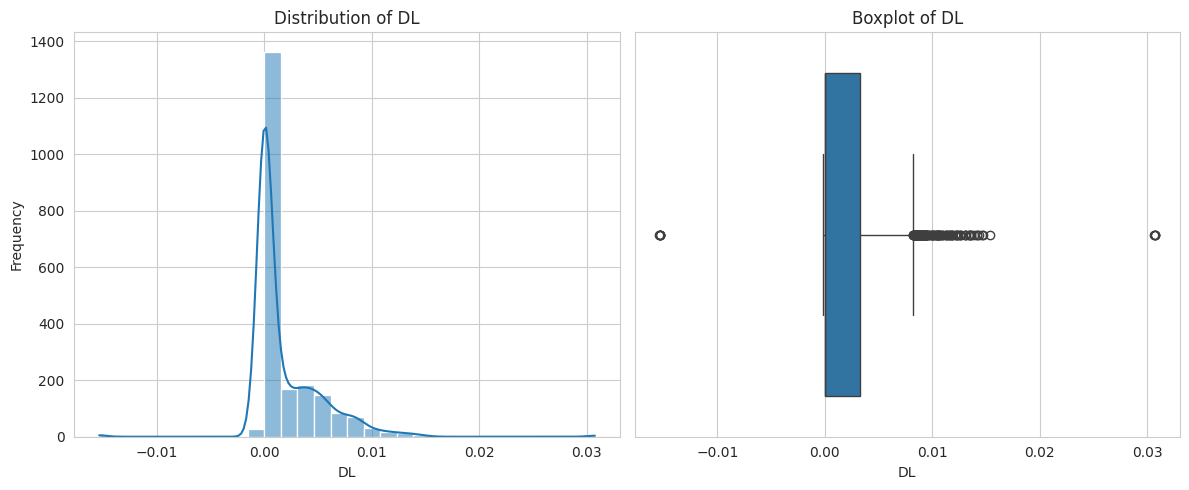

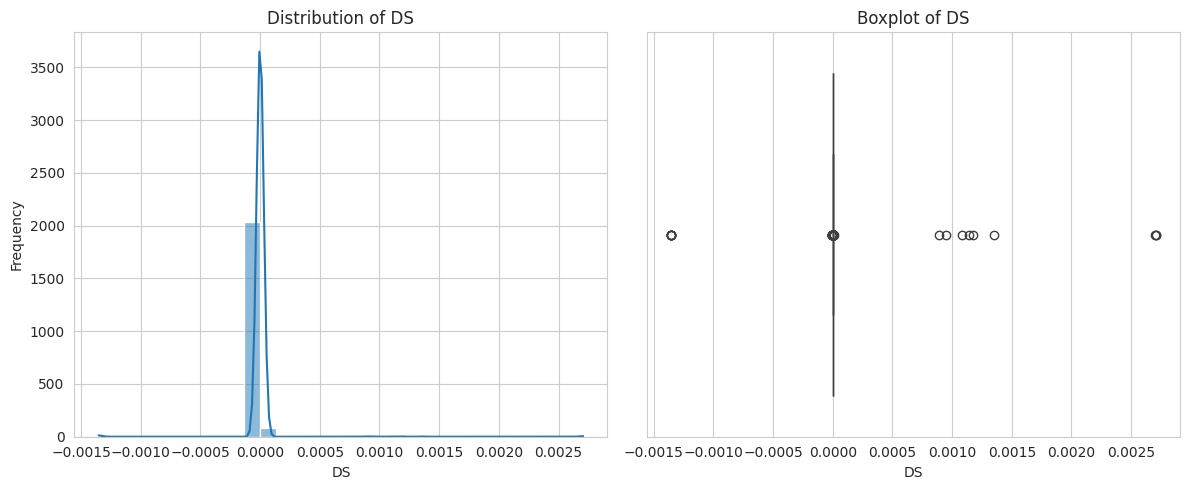

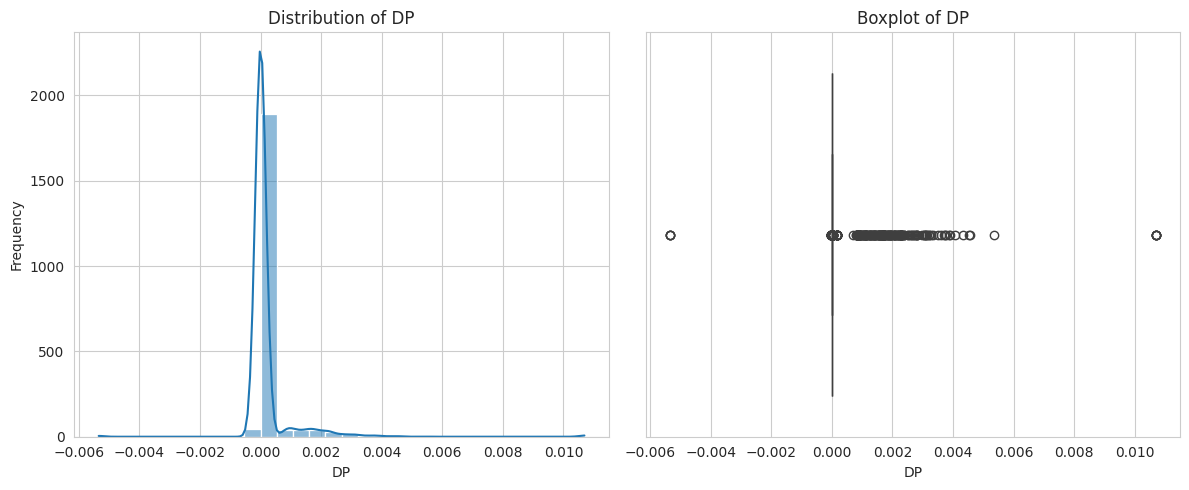

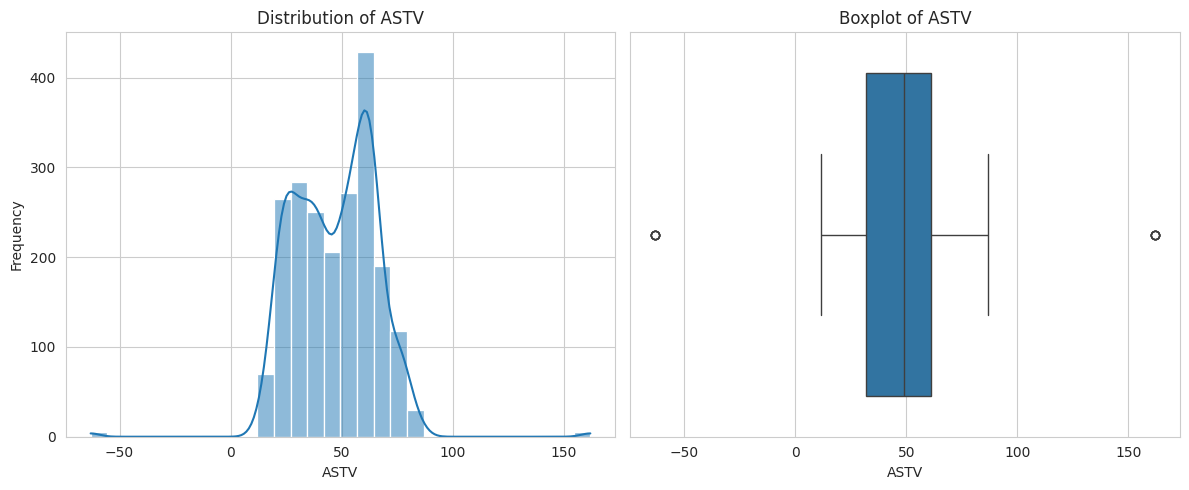

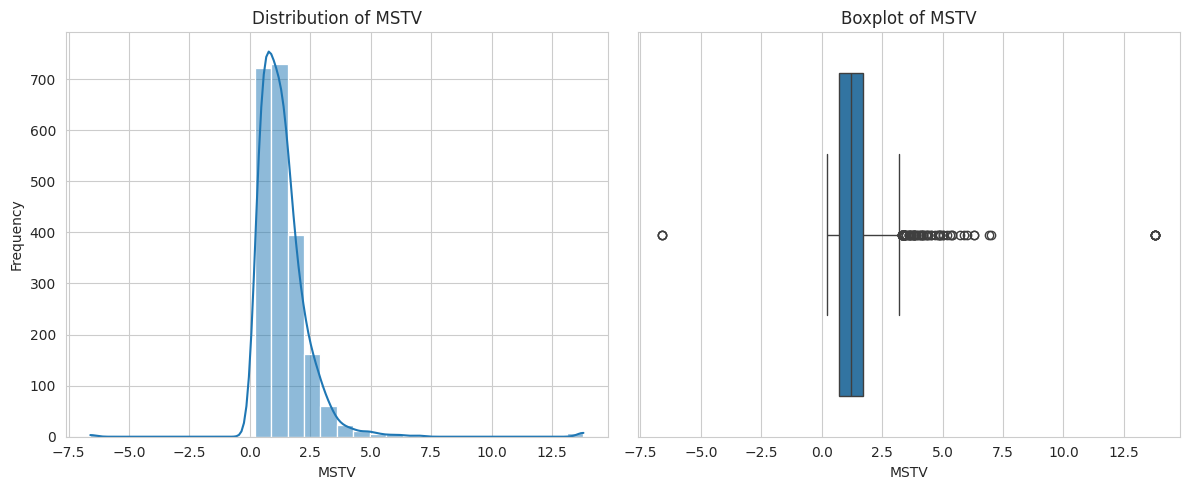

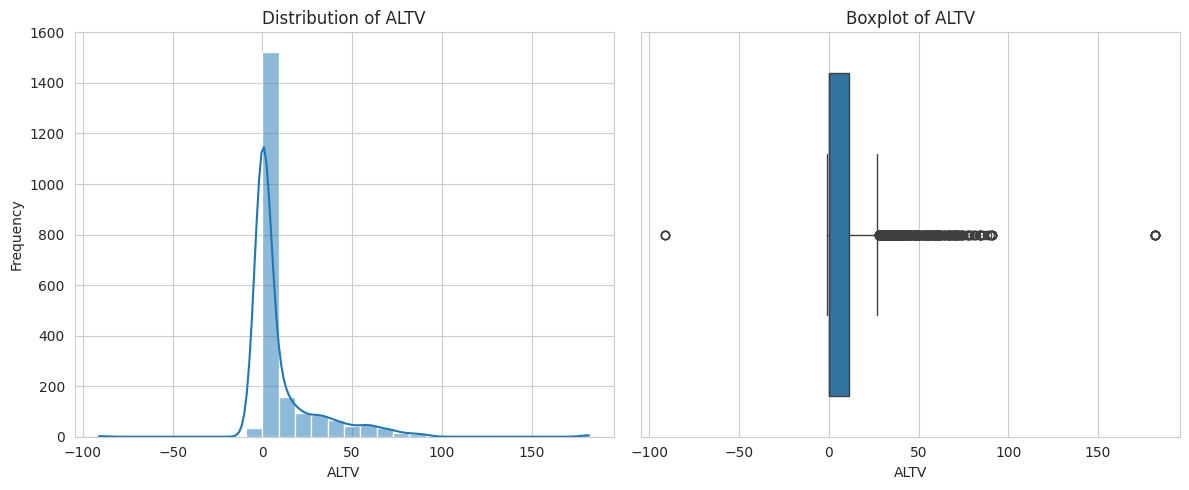

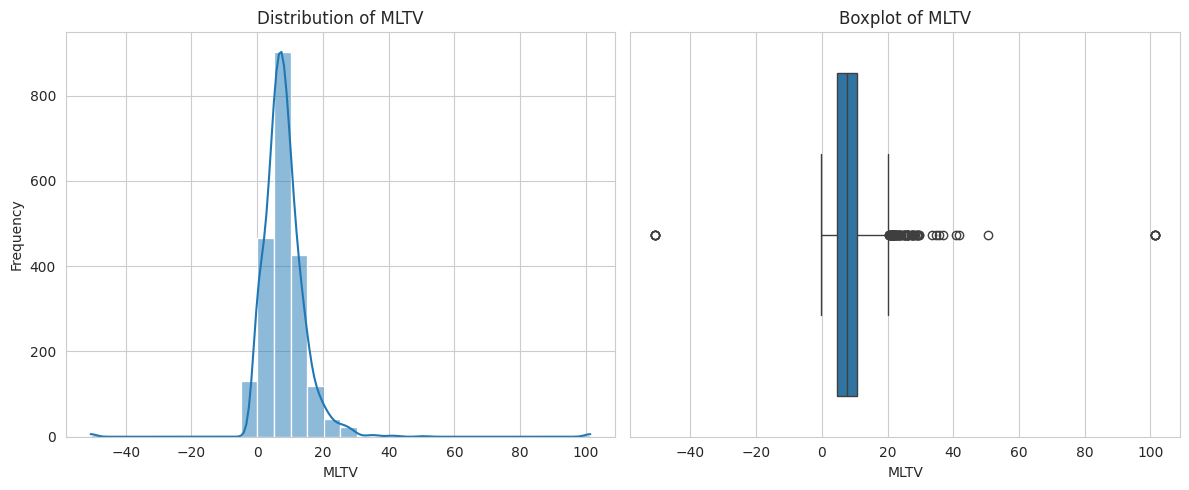

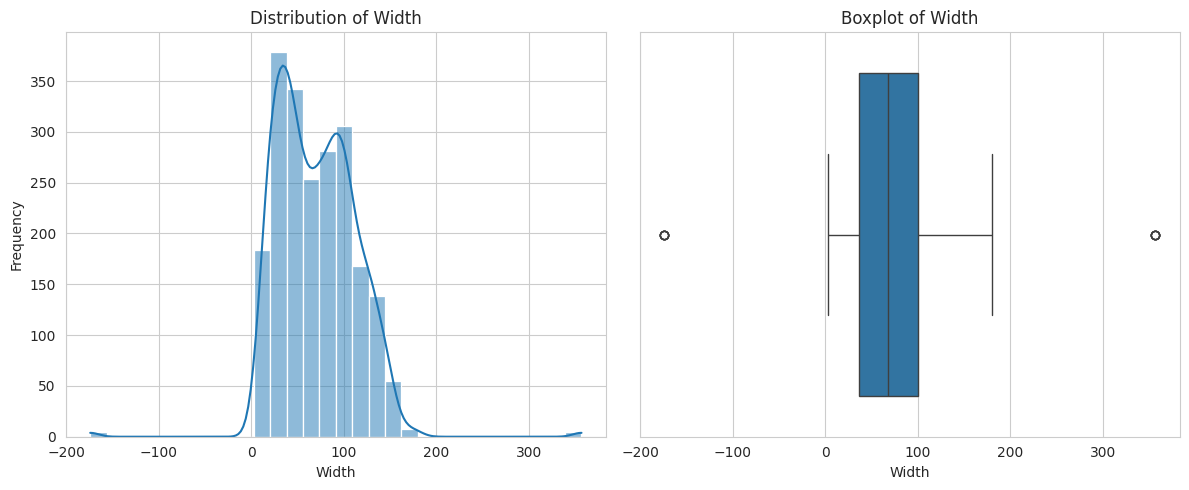

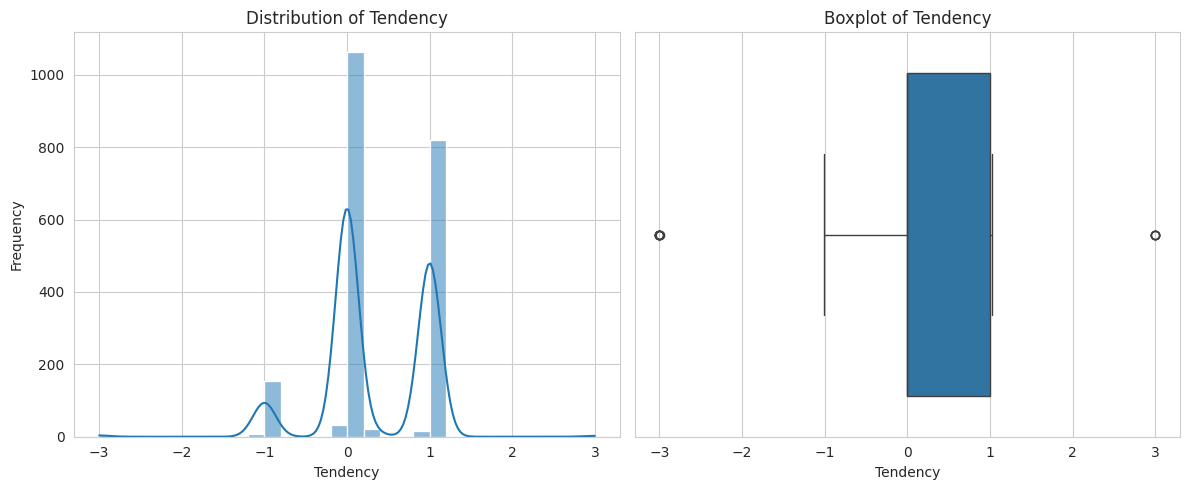


Creating Bar Charts for Categorical Variables:

Creating Scatter Plots and Correlation Heatmap:


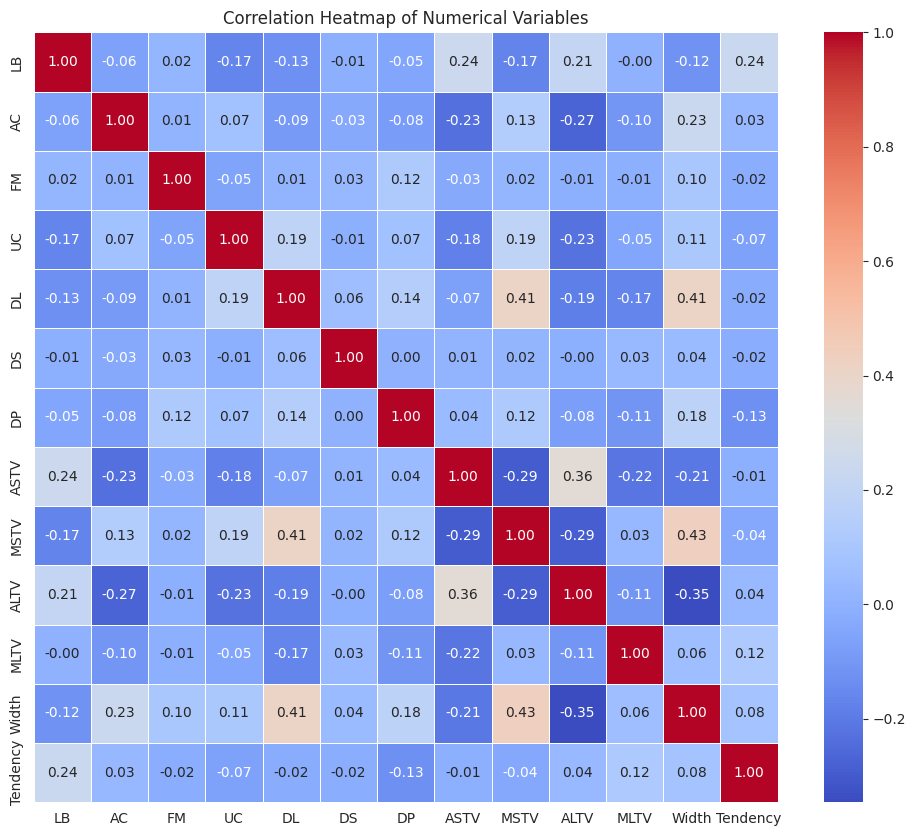


Creating Advanced Visualizations:

Creating Pair Plot for a subset of columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'NSP']


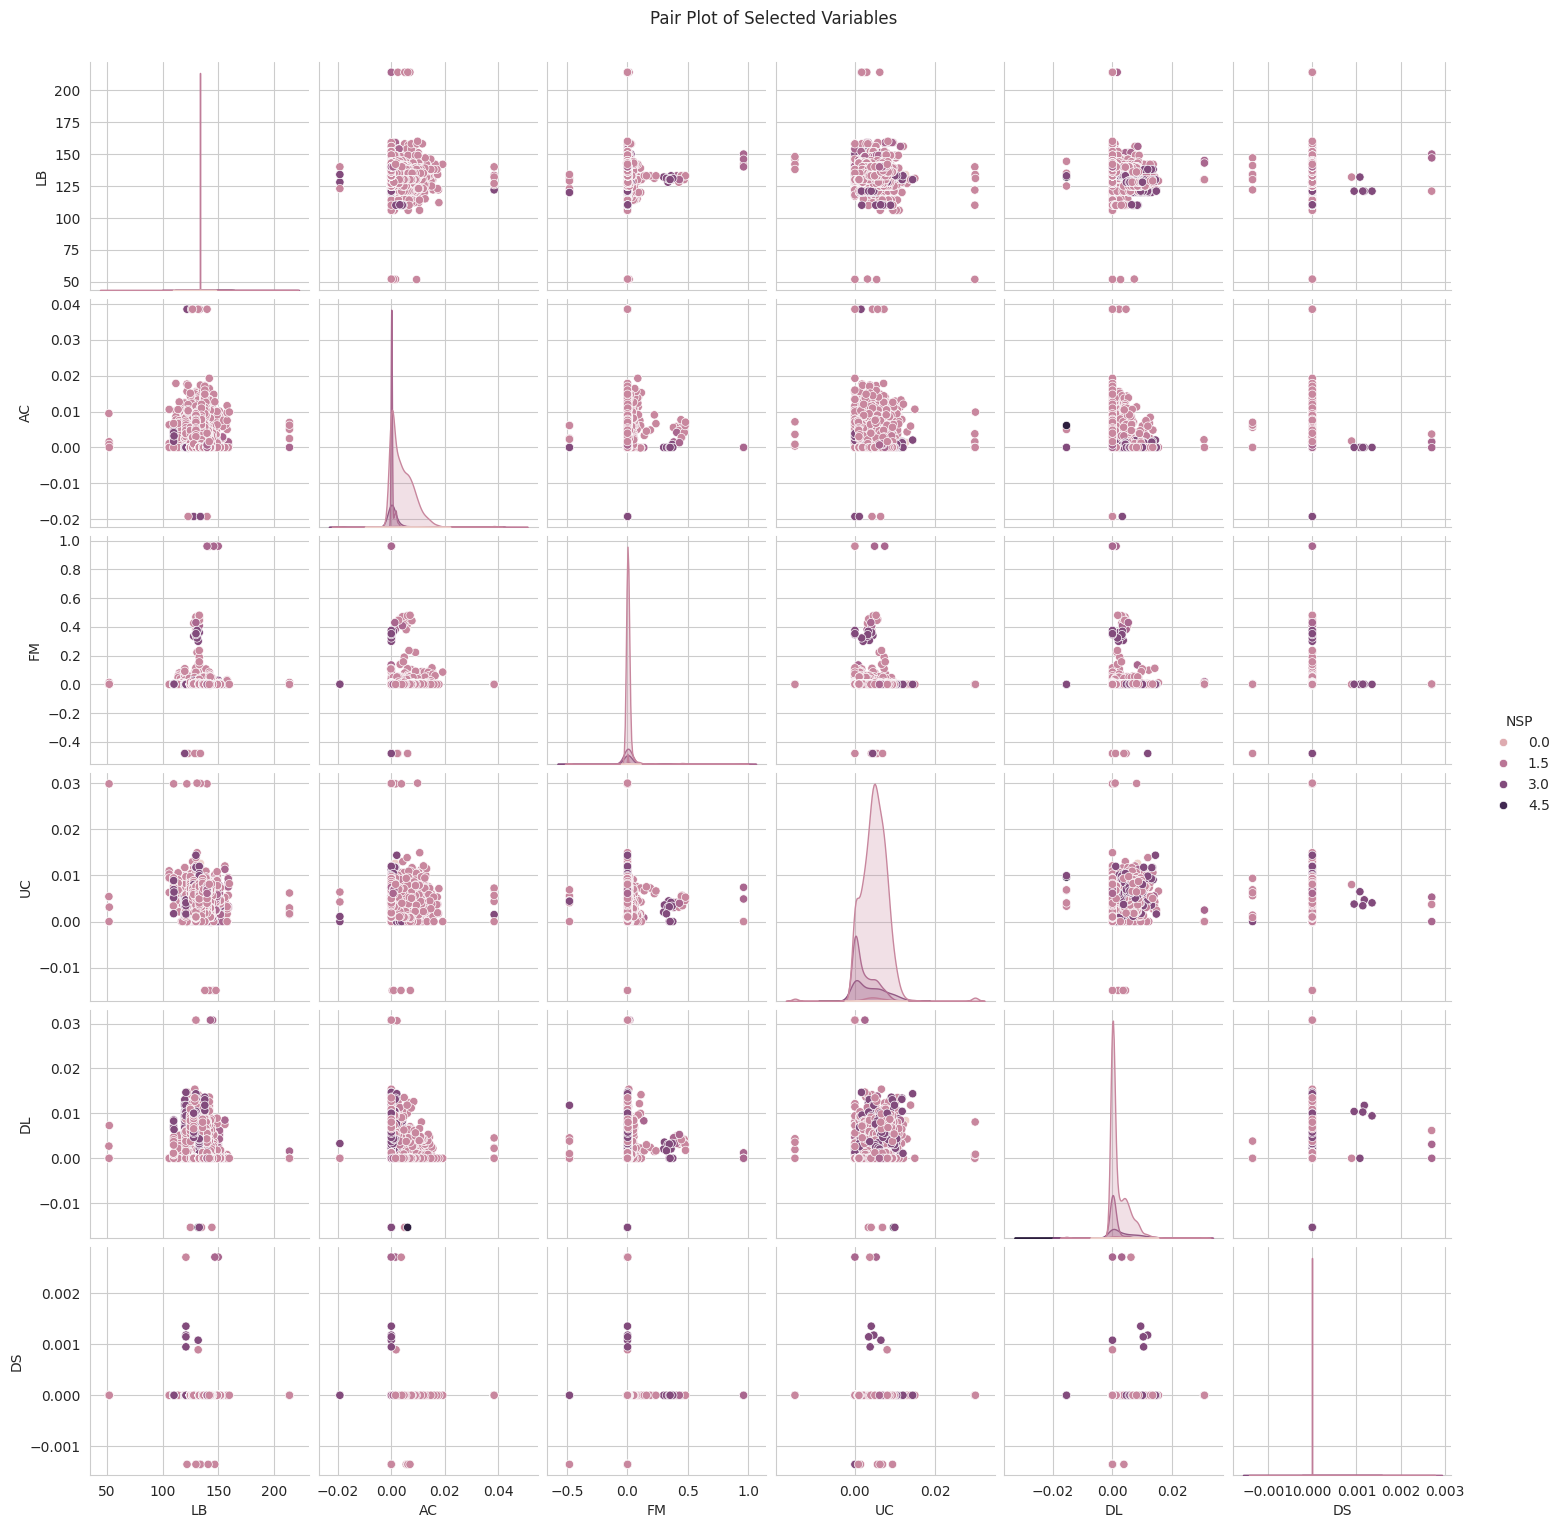


Creating Violin Plots Grouped by NSP:


<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


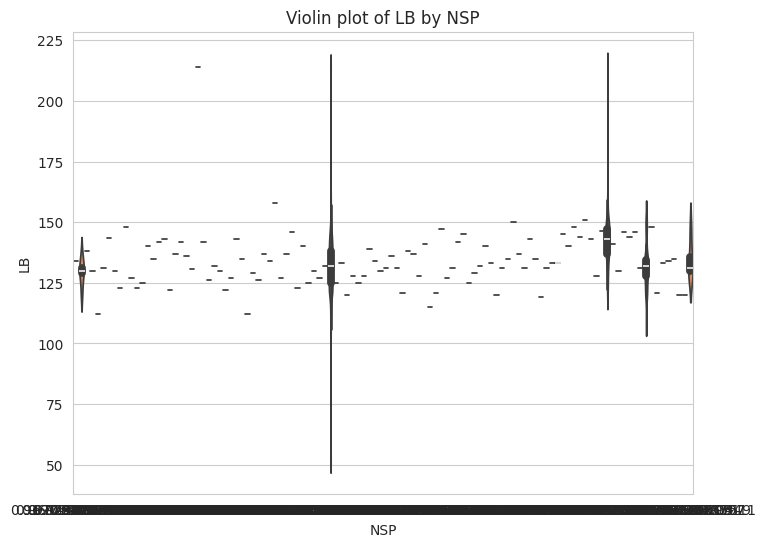

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


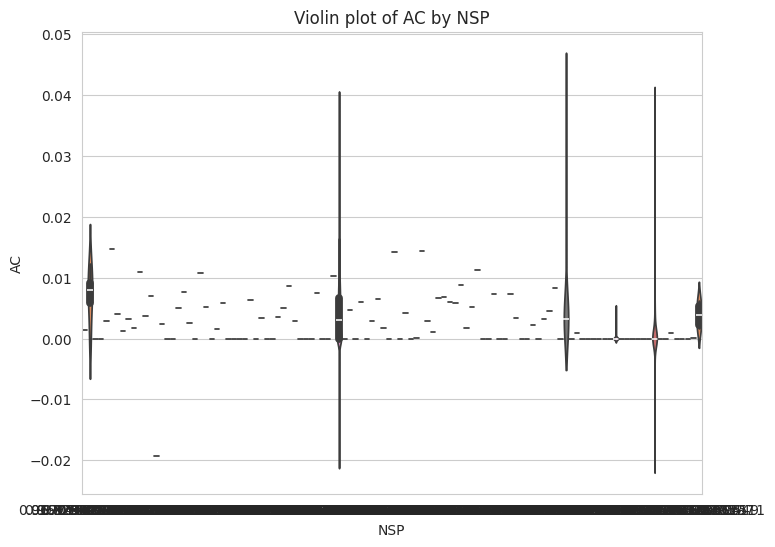

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


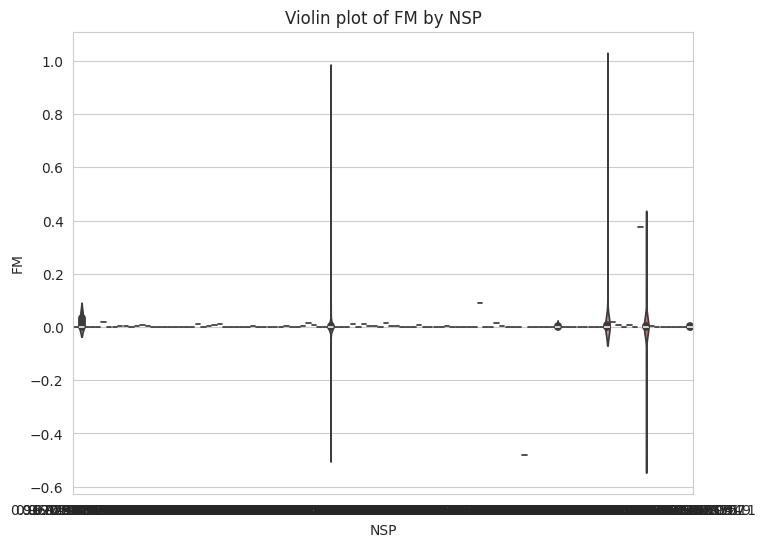

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


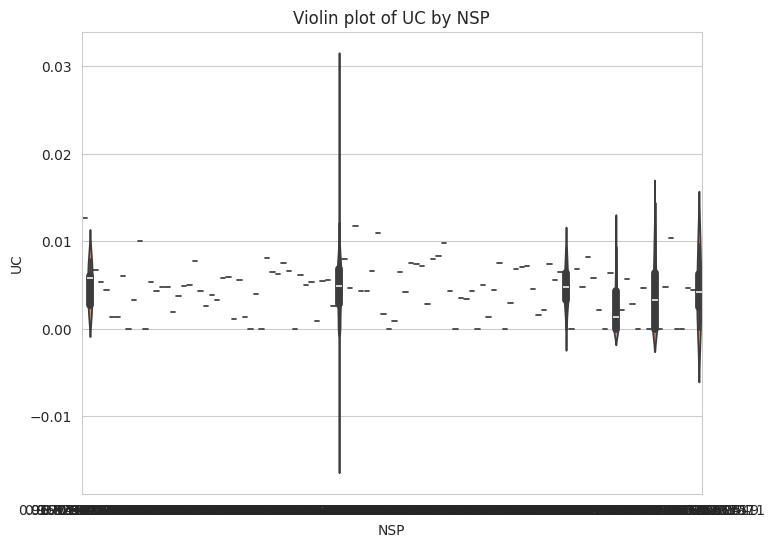

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


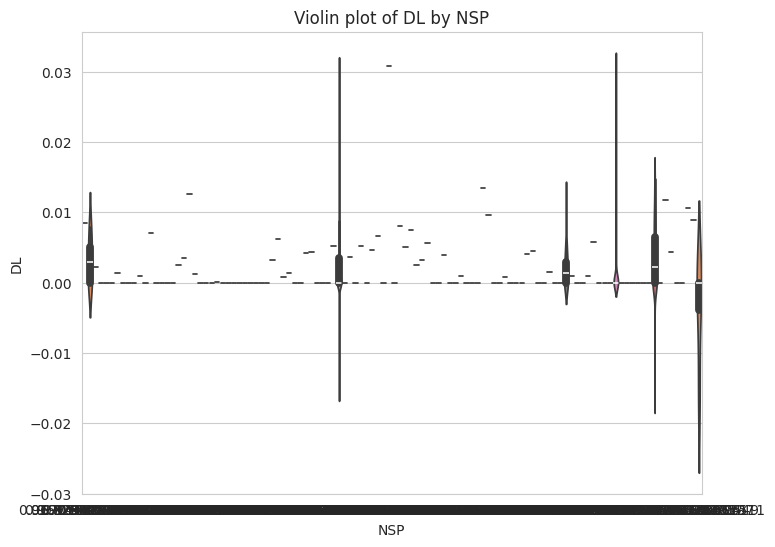

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


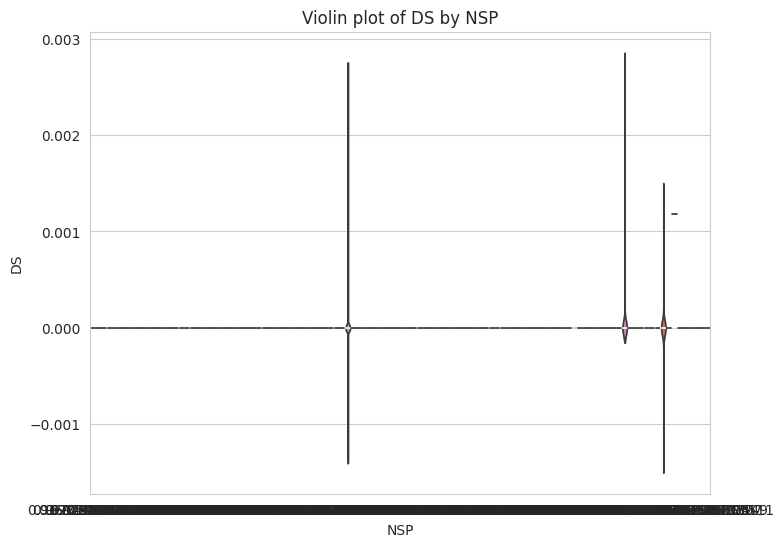

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


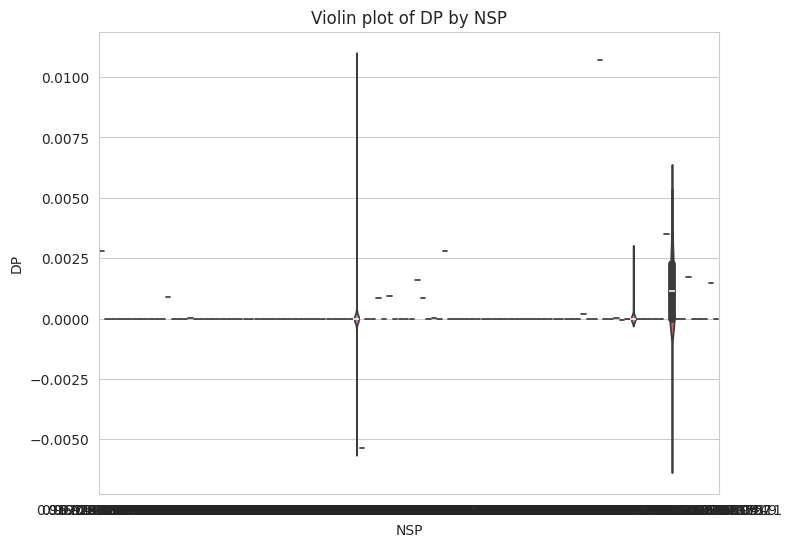

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


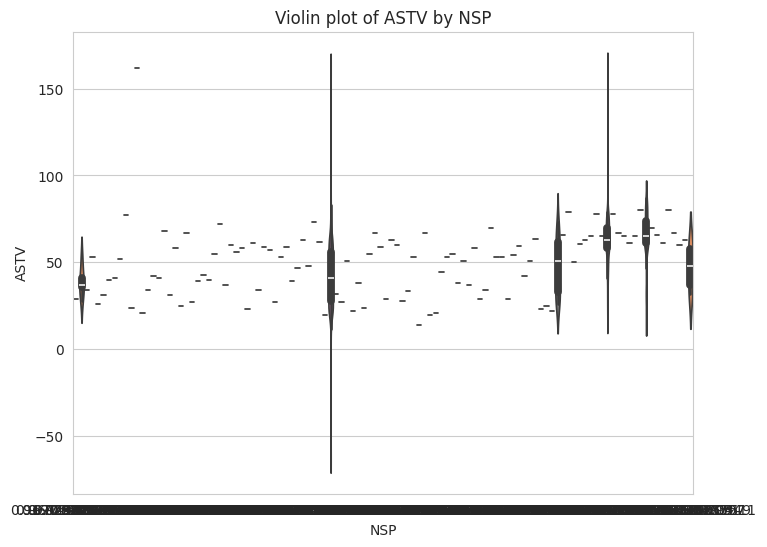

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


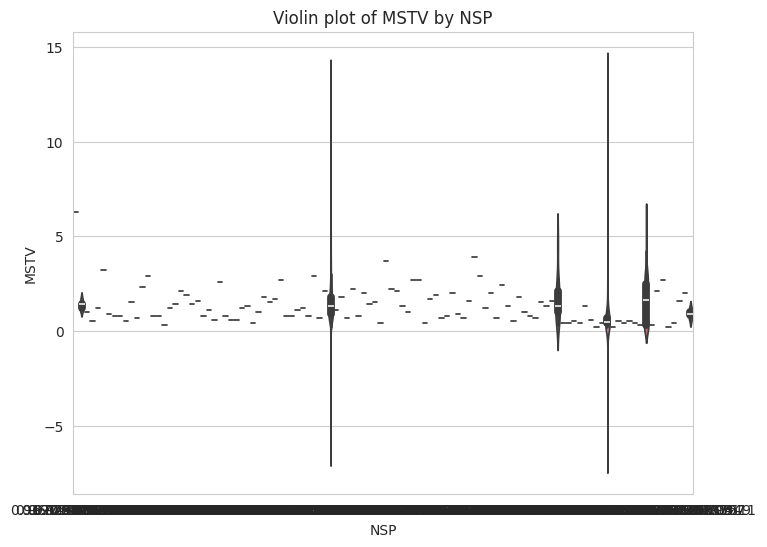

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


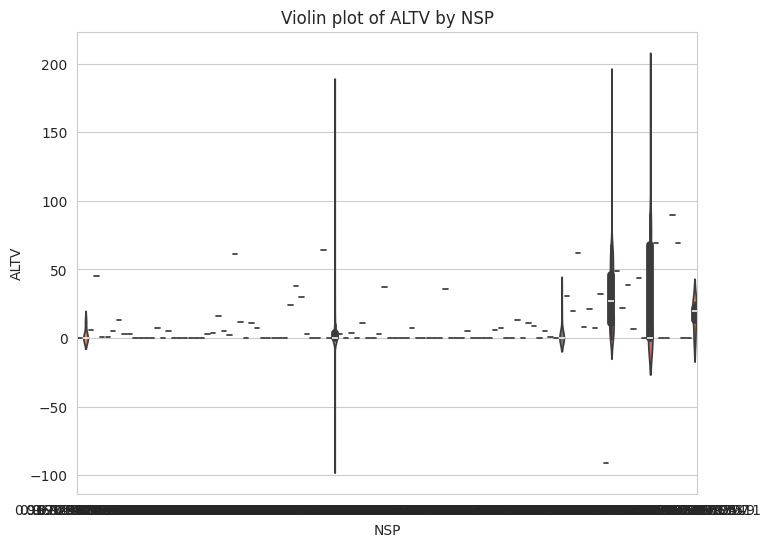

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


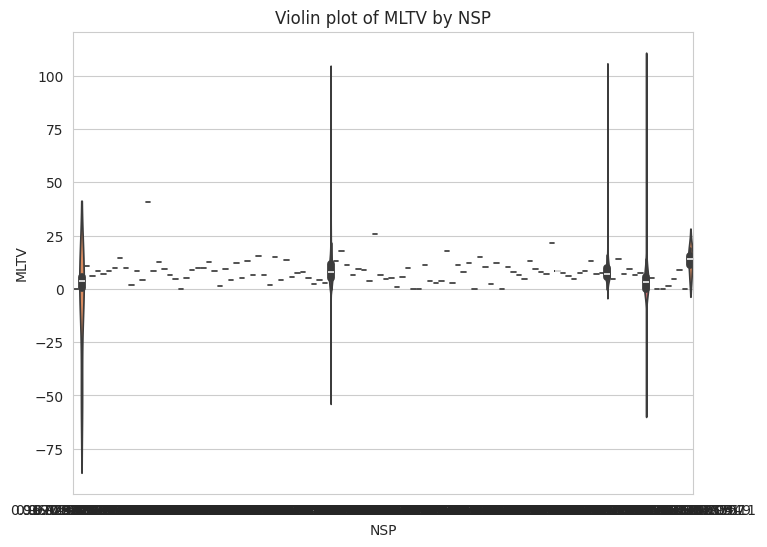

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


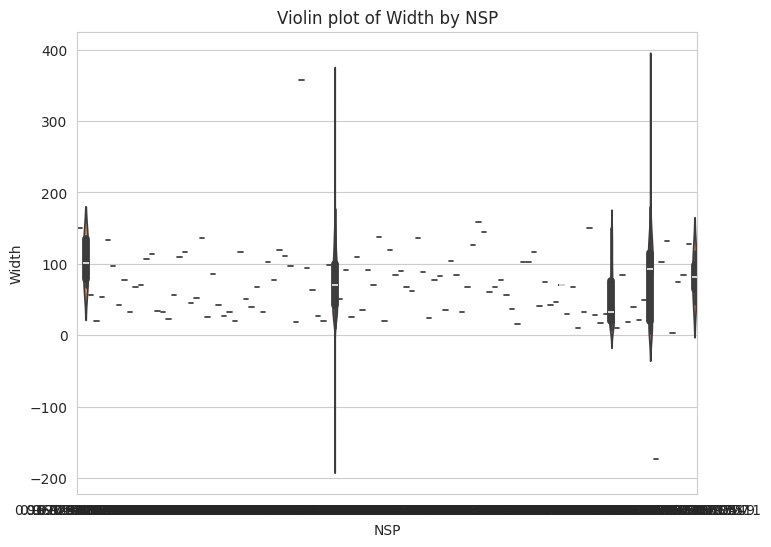

<ipython-input-5-1602a1a4ee93>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


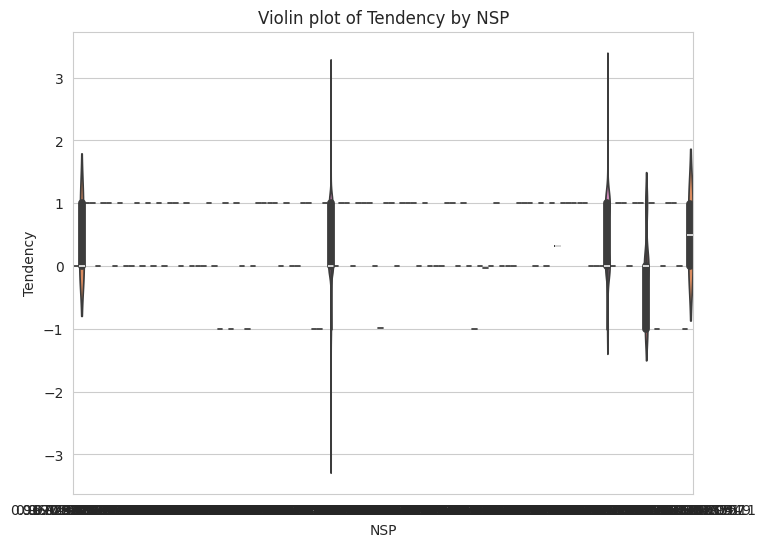


Visualizing Data:

Creating Histograms and Boxplots for Numerical Variables:


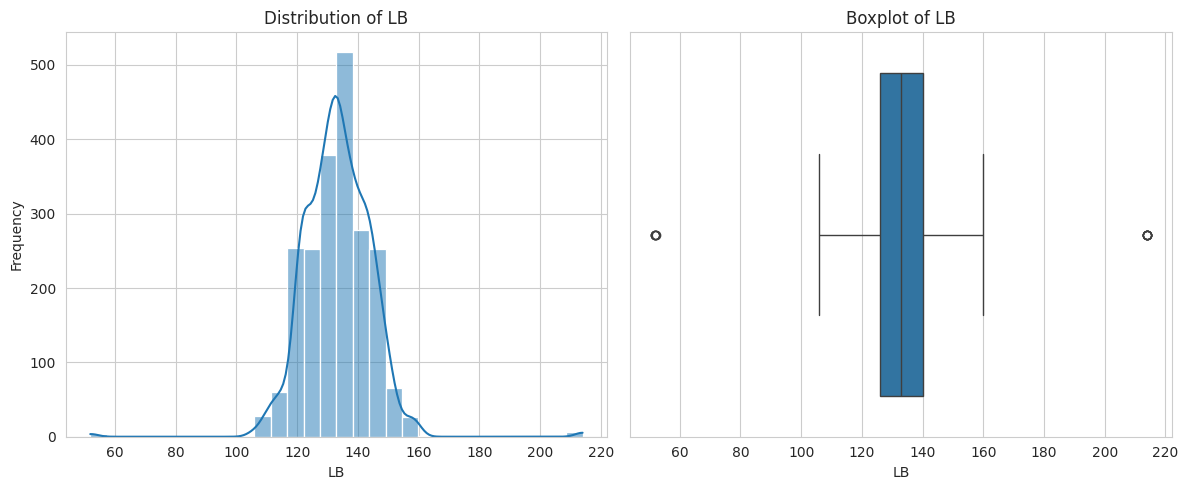

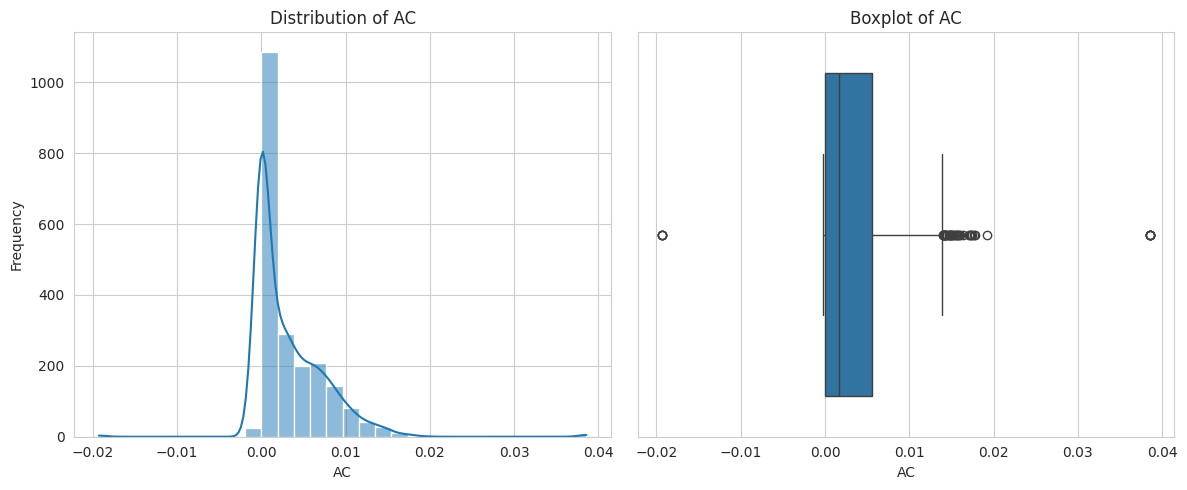

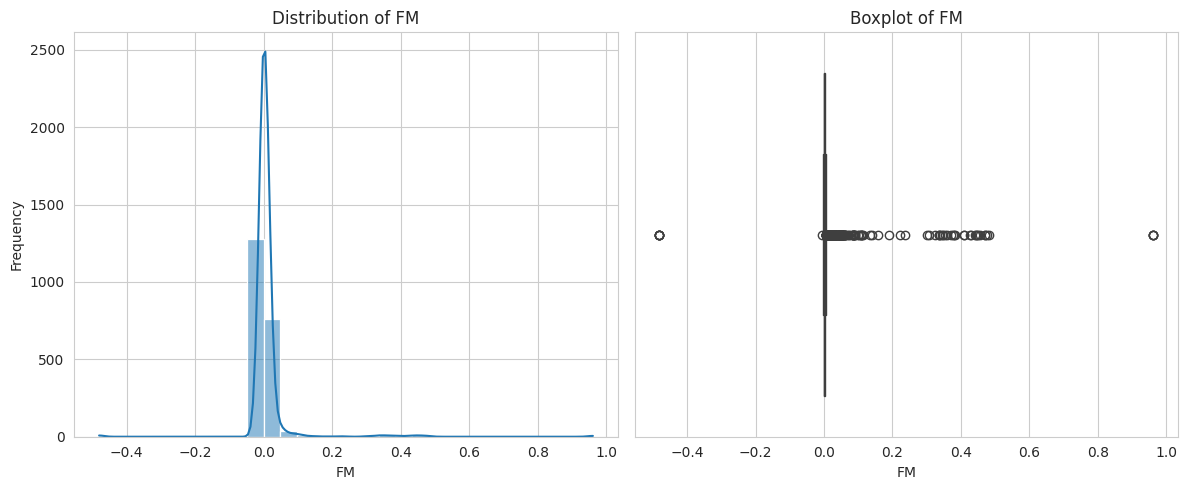

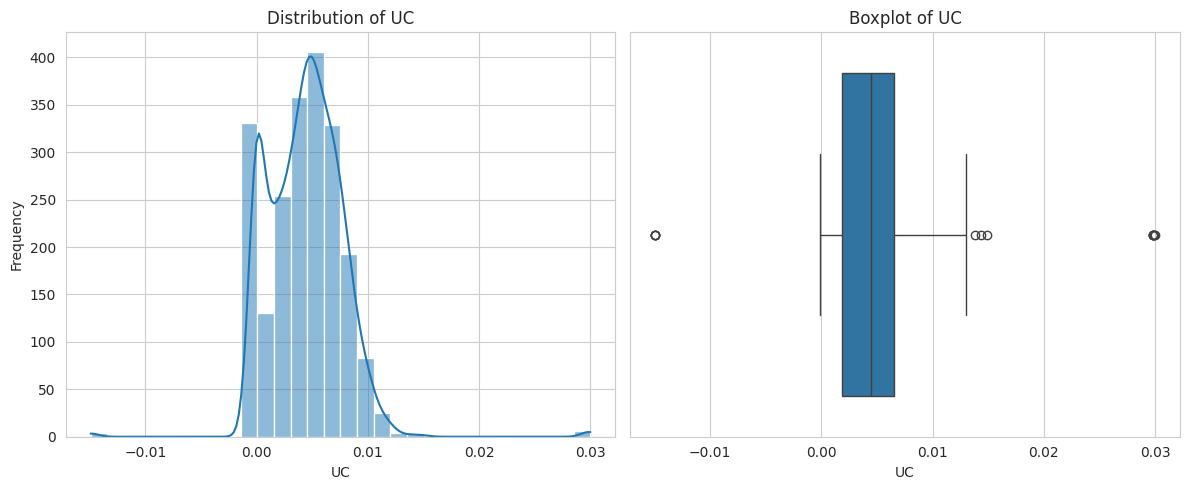

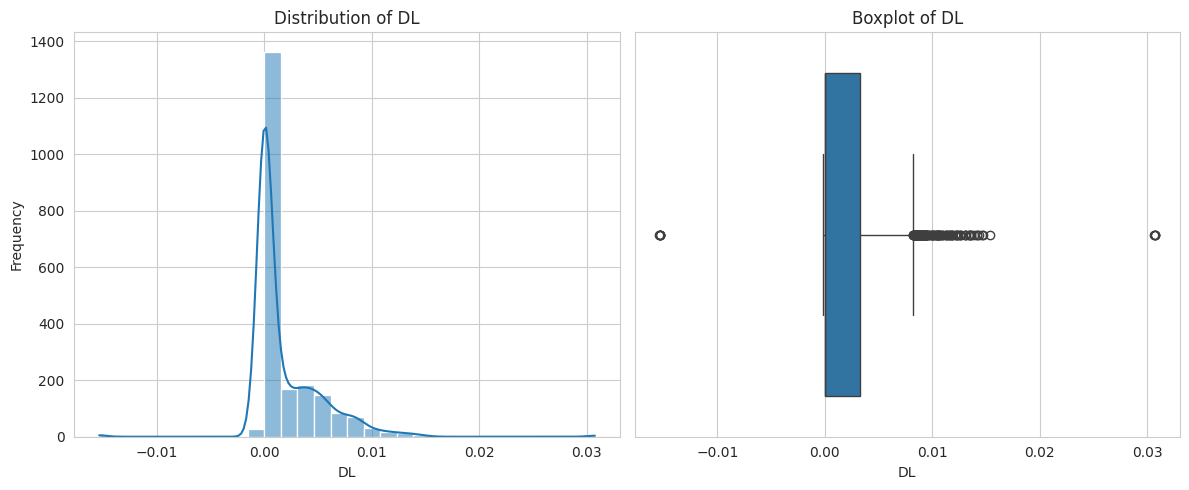

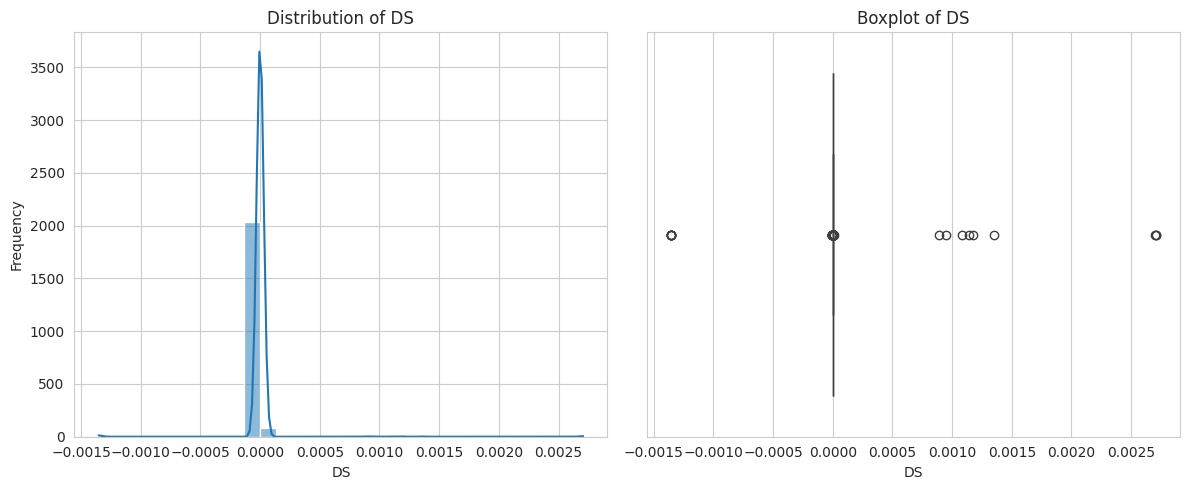

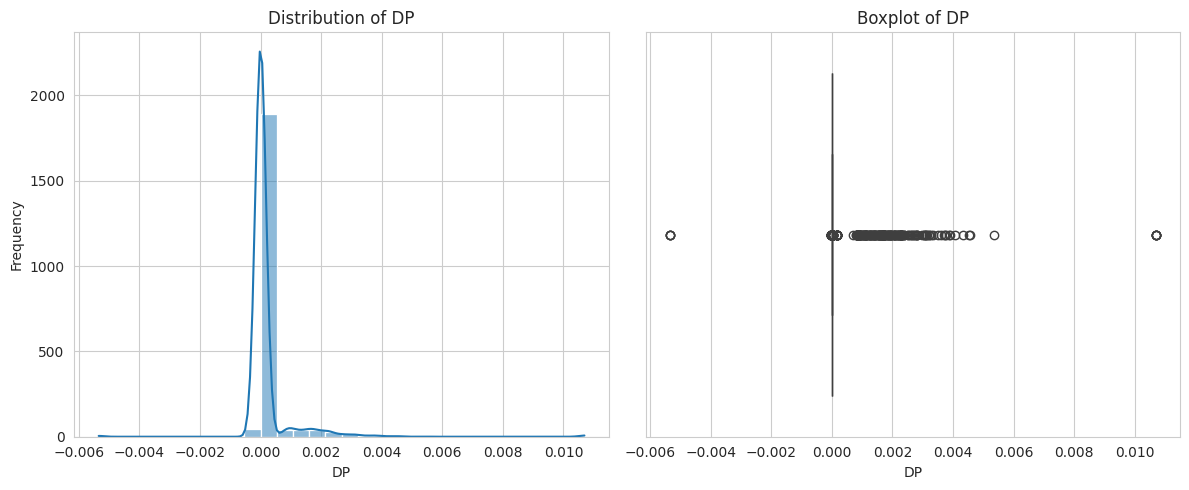

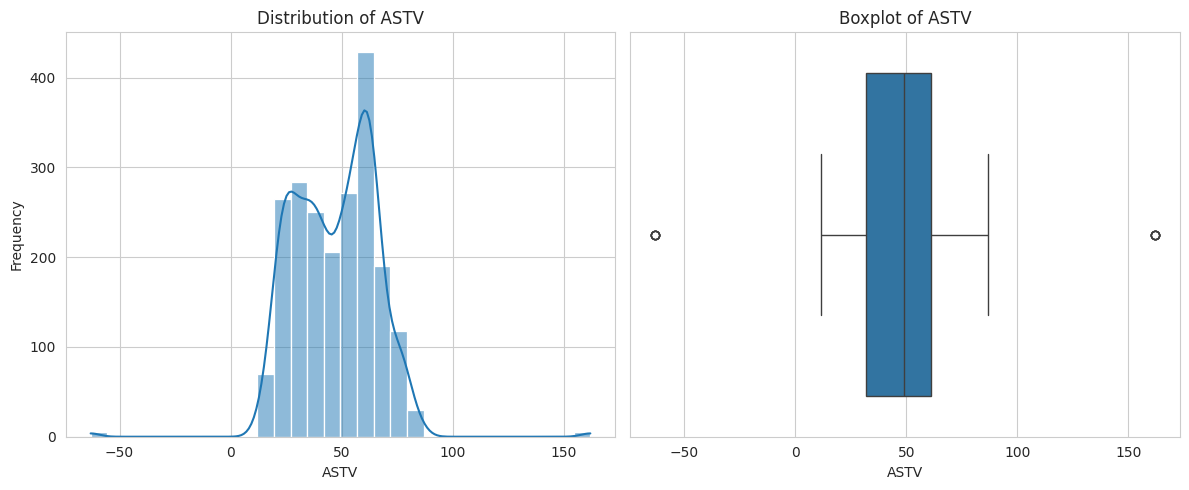

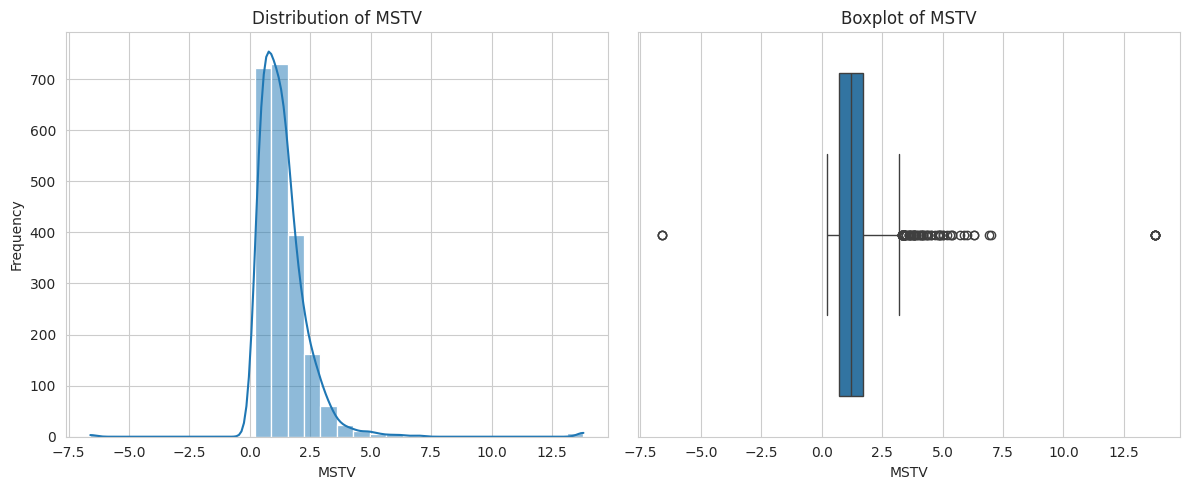

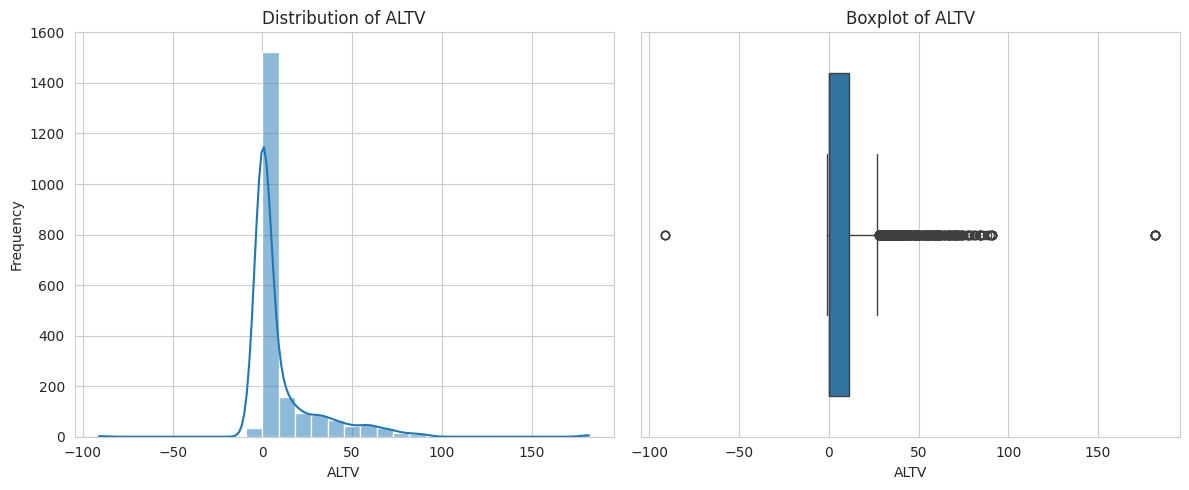

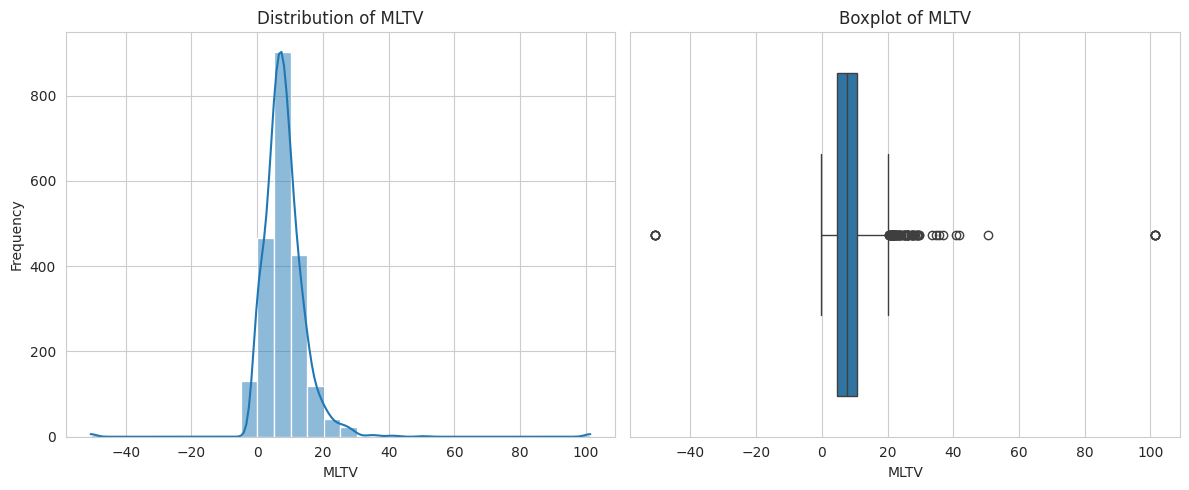

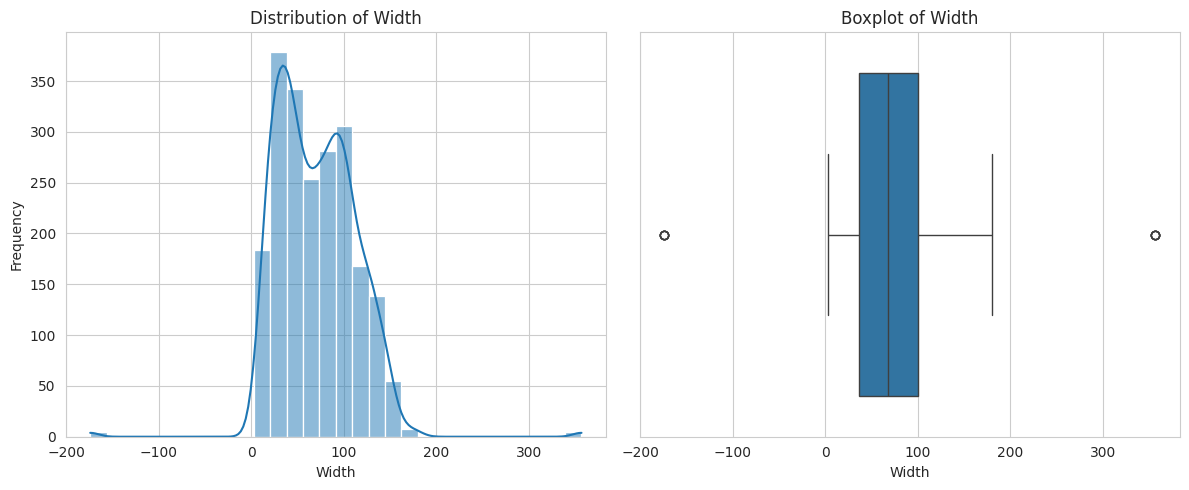

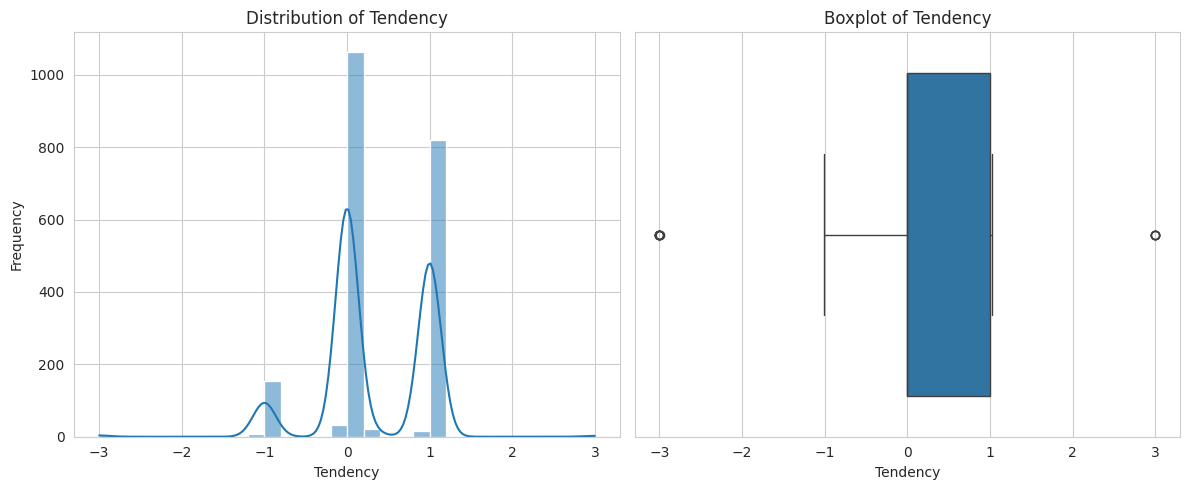


Creating Bar Charts for Categorical Variables:

Creating Scatter Plots and Correlation Heatmap:


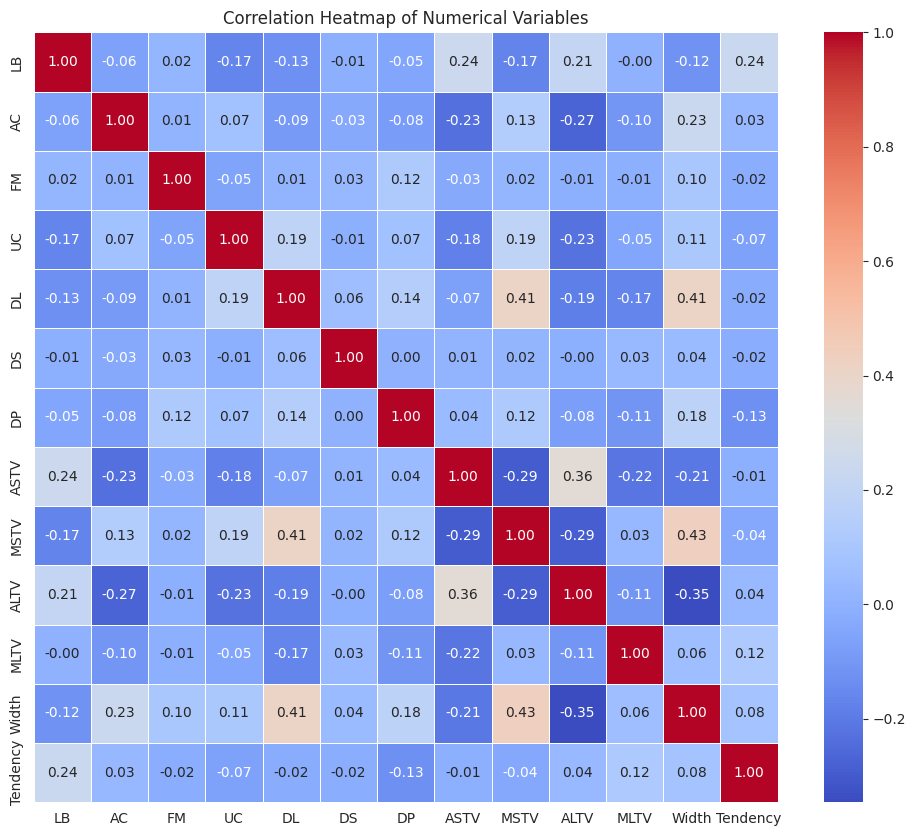


Creating Advanced Visualizations:

Creating Pair Plot for a subset of columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'NSP']


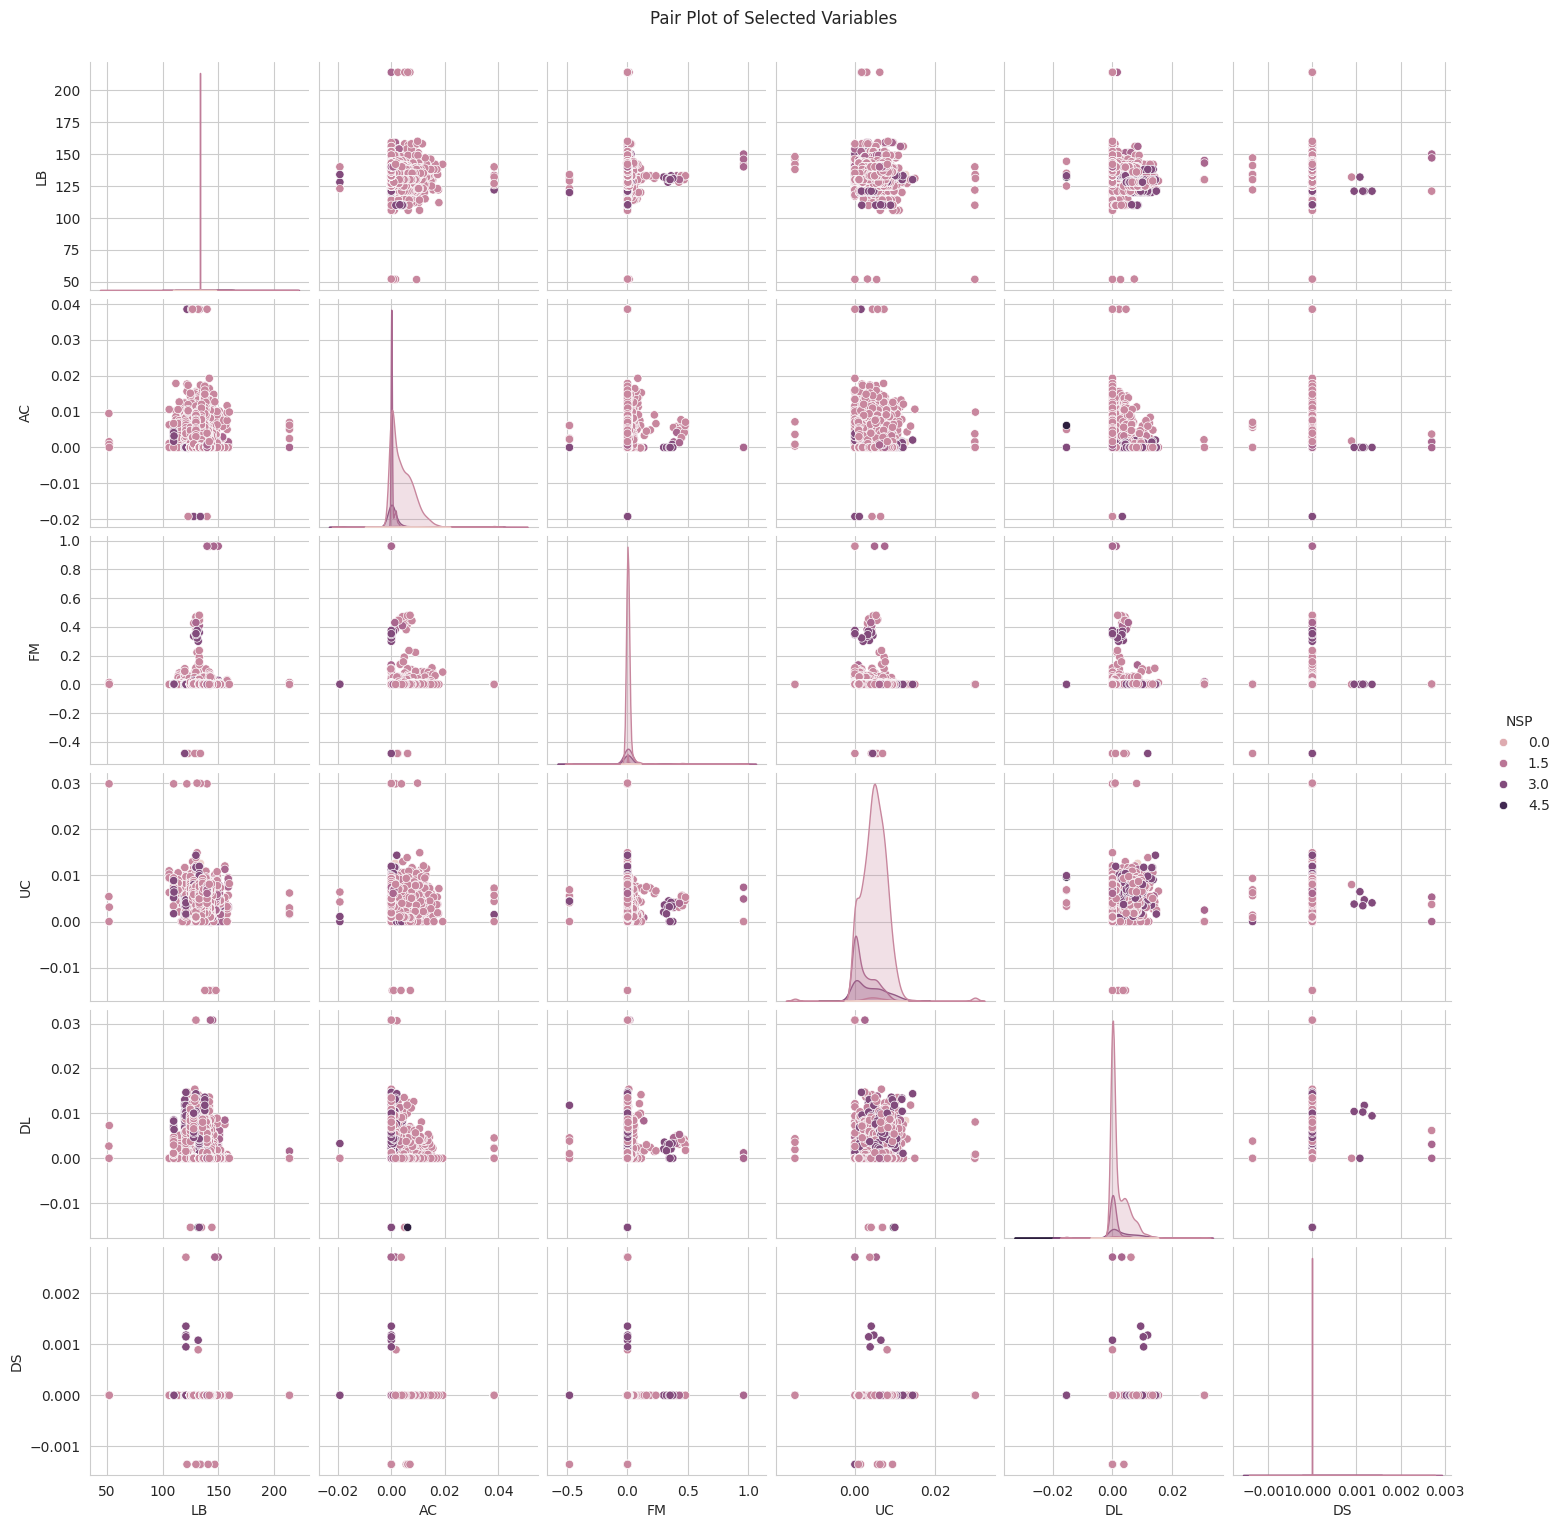


Creating Violin Plots Grouped by NSP:


<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


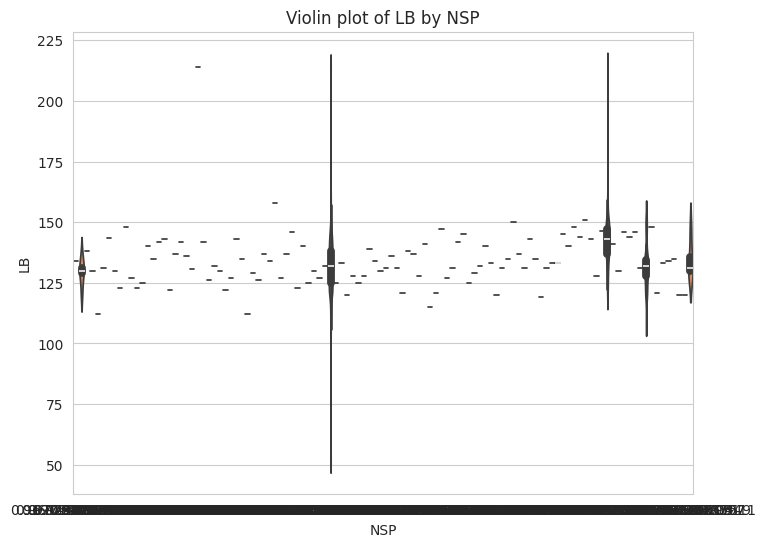

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


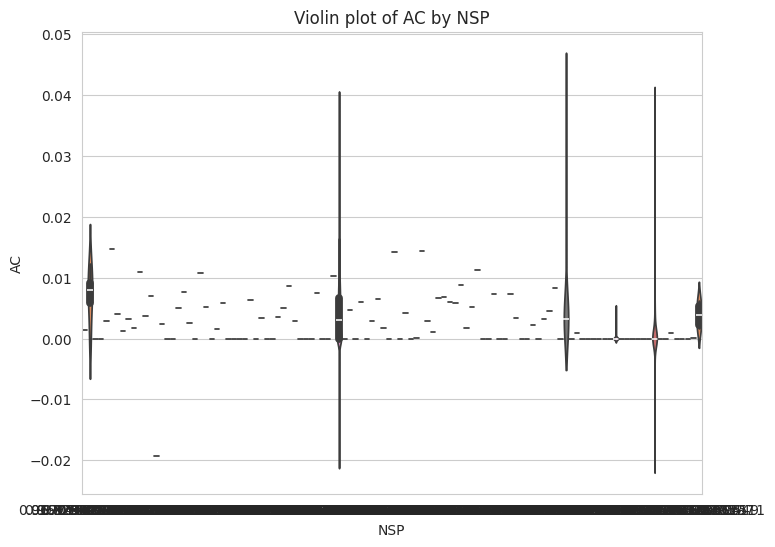

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


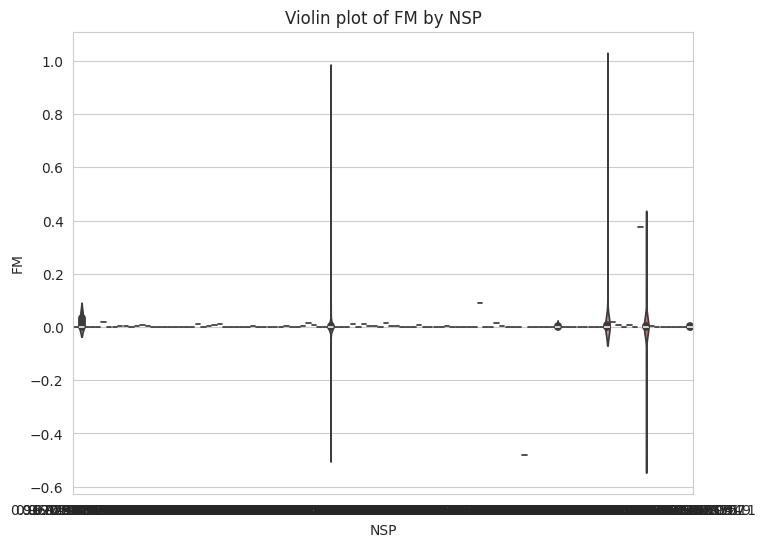

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


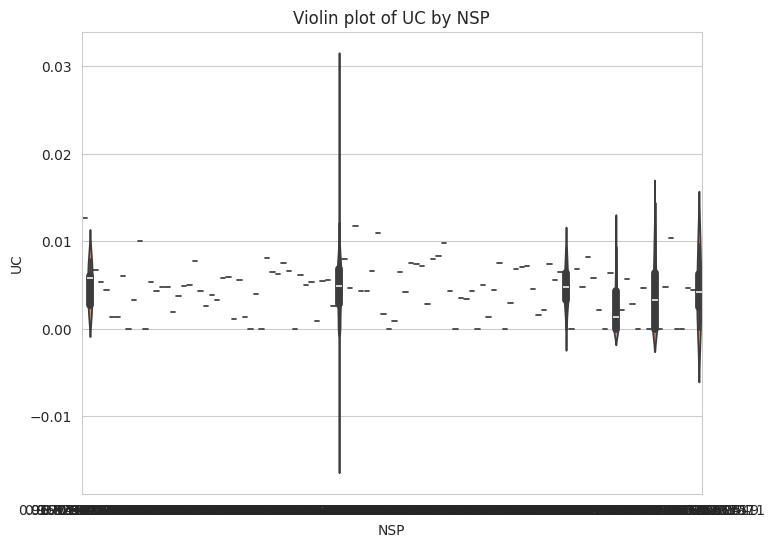

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


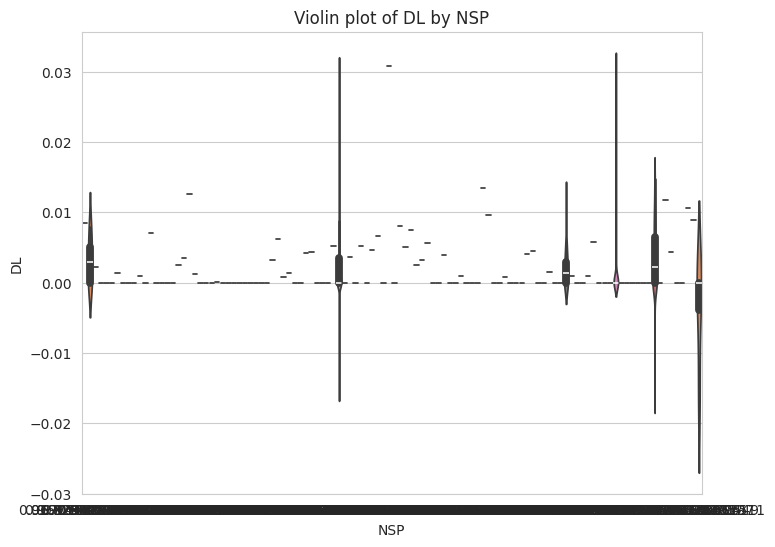

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


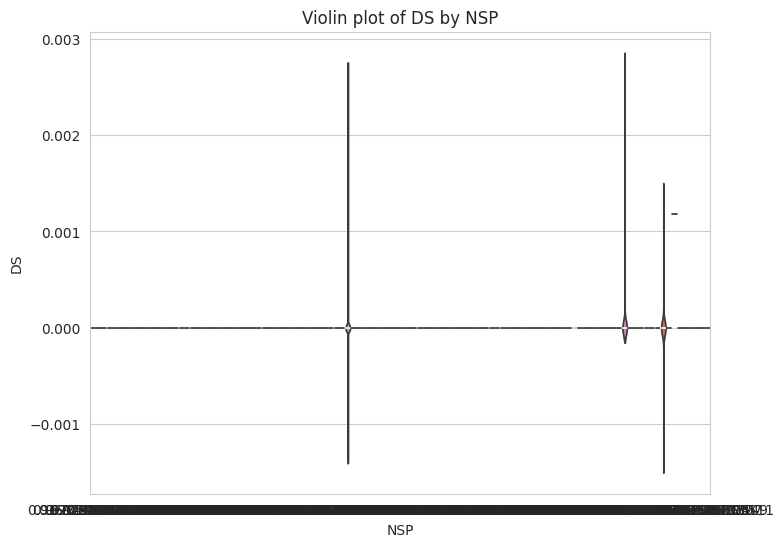

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


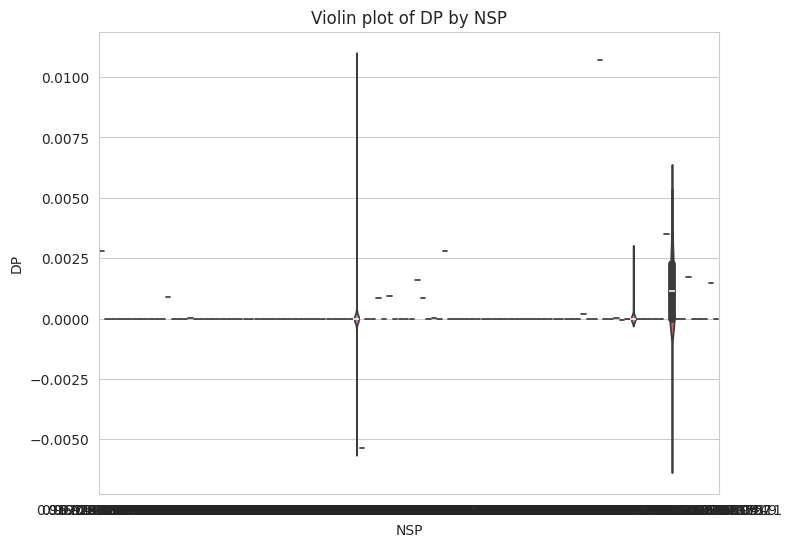

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


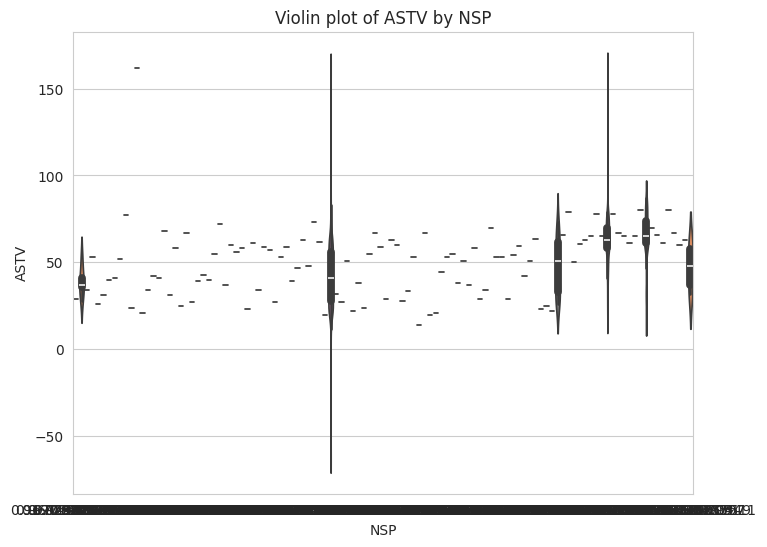

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


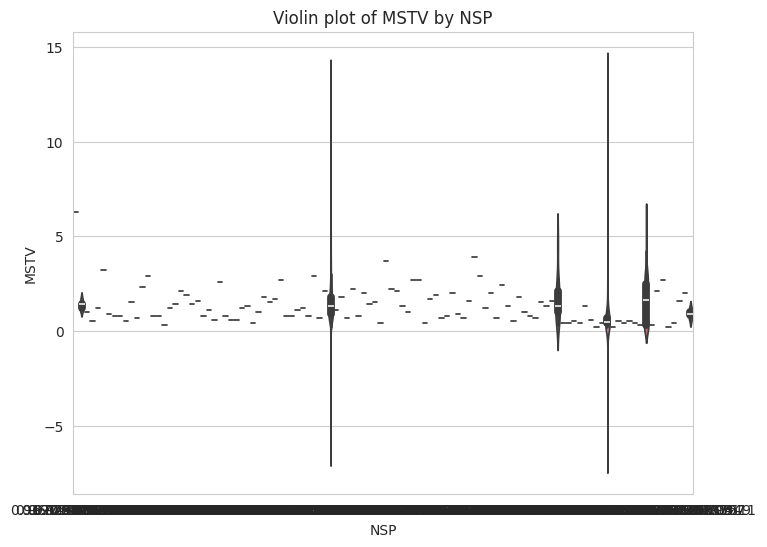

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


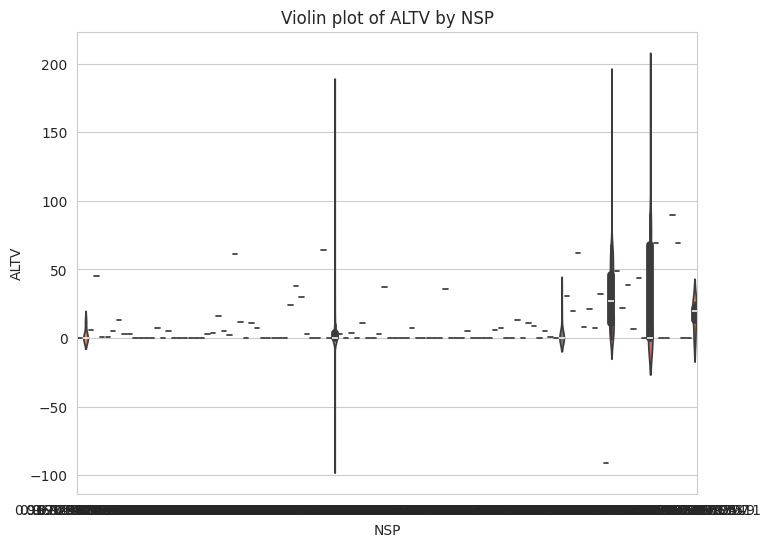

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


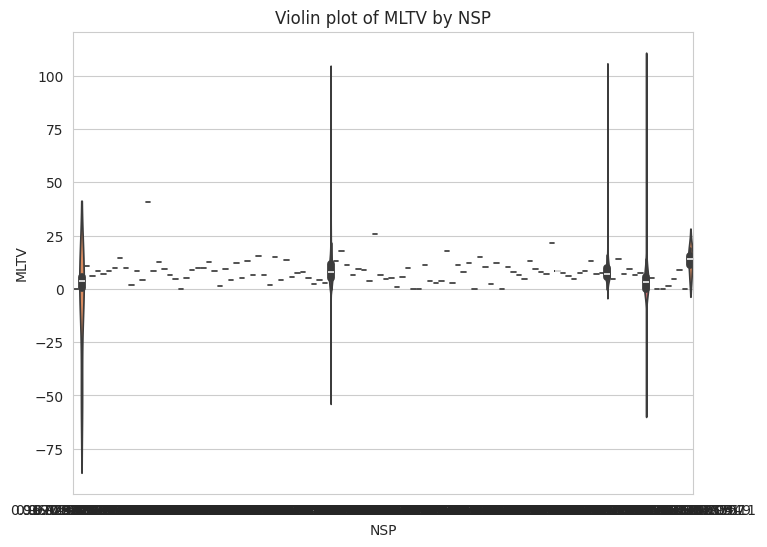

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


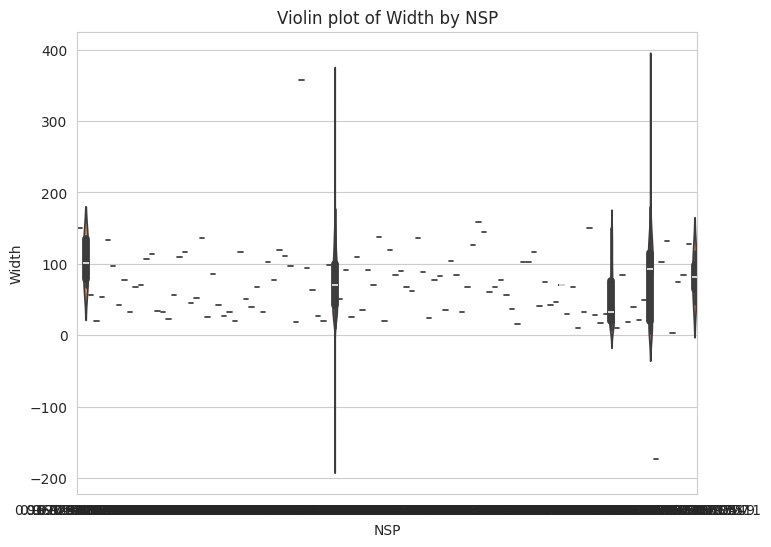

<ipython-input-5-1602a1a4ee93>:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='NSP', y=col, palette='muted')


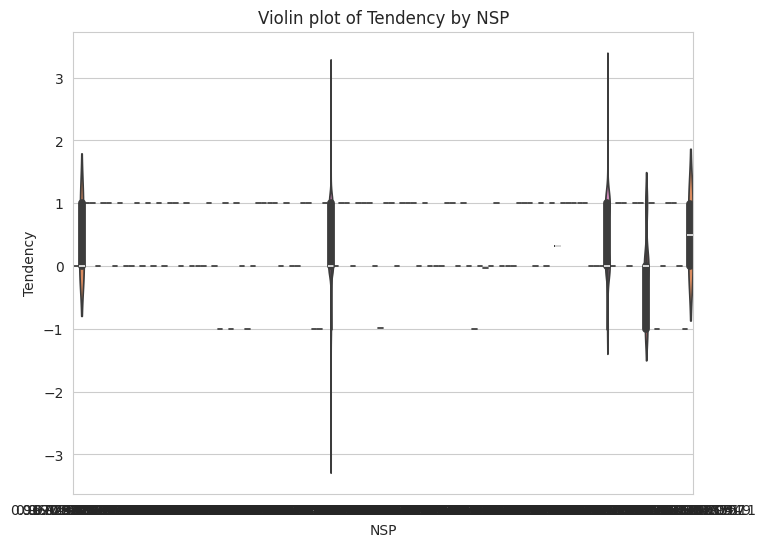


Data Visualization complete.


In [5]:
# prompt: 3.	Data Visualization:
# ●	Create histograms or boxplots to visualize the distributions of various numerical variables.
# ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
# ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
# ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Identify numerical and categorical columns (adjust based on your dataset)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'NSP' from numerical_cols as it's likely the target variable and treated as categorical for some plots
if 'NSP' in numerical_cols:
    numerical_cols.remove('NSP')

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
# Include 'NSP' in categorical_cols if it exists
if 'NSP' in df.columns:
    categorical_cols.append('NSP')


print("\nVisualizing Data:")

# Histograms and Boxplots for numerical variables
print("\nCreating Histograms and Boxplots for Numerical Variables:")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Bar Charts and Pie Charts for categorical variables (for illustrative purposes, choose relevant columns)
print("\nCreating Bar Charts for Categorical Variables:")
# Choose a few relevant categorical columns to visualize frequency
relevant_categorical_cols = [col for col in categorical_cols if df[col].nunique() < 20] # Limit to columns with fewer unique values for clarity

for col in relevant_categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col} Categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Scatter plots and Correlation Heatmap for numerical variables
print("\nCreating Scatter Plots and Correlation Heatmap:")
# Create scatter plots for a few pairs of numerical variables (choose relevant ones)
# Example: Scatter plot between 'BPM' and 'ASTV'
if 'BPM' in numerical_cols and 'ASTV' in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='BPM', y='ASTV', alpha=0.6)
    plt.title('Scatter plot of BPM vs ASTV')
    plt.xlabel('BPM')
    plt.ylabel('ASTV')
    plt.show()

# Correlation Heatmap
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()
else:
    print("Not enough numerical columns to create a correlation heatmap.")


# Advanced visualization techniques
print("\nCreating Advanced Visualizations:")

# Pair plot (can be time-consuming for many variables)
# Select a subset of numerical columns for the pair plot for better readability
subset_numerical_cols = numerical_cols[:6] + ['NSP'] if 'NSP' in df.columns and len(numerical_cols) > 0 else numerical_cols[:6]
if len(subset_numerical_cols) > 1:
    print(f"\nCreating Pair Plot for a subset of columns: {subset_numerical_cols}")
    sns.pairplot(df[subset_numerical_cols], hue='NSP' if 'NSP' in df.columns else None, diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Variables', y=1.02)
    plt.show()
else:
    print("Not enough columns to create a pair plot.")


# Violin plots for numerical variables grouped by the target variable (NSP)
if 'NSP' in df.columns and len(numerical_cols) > 0:
    print("\nCreating Violin Plots Grouped by NSP:")
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=df, x='NSP', y=col, palette='muted')
        plt.title(f'Violin plot of {col} by NSP')
        plt.xlabel('NSP')
        plt.ylabel(col)
        plt.show()
else:
    print("NSP column not found or no numerical columns to create violin plots.")
# prompt: 3.	Data Visualization:
# ●	Create histograms or boxplots to visualize the distributions of various numerical variables.
# ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
# ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
# ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Identify numerical and categorical columns (adjust based on your dataset)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude 'NSP' from numerical_cols as it's likely the target variable and treated as categorical for some plots
if 'NSP' in numerical_cols:
    numerical_cols.remove('NSP')

categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
# Include 'NSP' in categorical_cols if it exists
if 'NSP' in df.columns:
    categorical_cols.append('NSP')


print("\nVisualizing Data:")

# Histograms and Boxplots for numerical variables
print("\nCreating Histograms and Boxplots for Numerical Variables:")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Bar Charts and Pie Charts for categorical variables (for illustrative purposes, choose relevant columns)
print("\nCreating Bar Charts for Categorical Variables:")
# Choose a few relevant categorical columns to visualize frequency
relevant_categorical_cols = [col for col in categorical_cols if df[col].nunique() < 20] # Limit to columns with fewer unique values for clarity

for col in relevant_categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col} Categories')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Scatter plots and Correlation Heatmap for numerical variables
print("\nCreating Scatter Plots and Correlation Heatmap:")
# Create scatter plots for a few pairs of numerical variables (choose relevant ones)
# Example: Scatter plot between 'BPM' and 'ASTV'
if 'BPM' in numerical_cols and 'ASTV' in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='BPM', y='ASTV', alpha=0.6)
    plt.title('Scatter plot of BPM vs ASTV')
    plt.xlabel('BPM')
    plt.ylabel('ASTV')
    plt.show()

# Correlation Heatmap
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()
else:
    print("Not enough numerical columns to create a correlation heatmap.")


# Advanced visualization techniques
print("\nCreating Advanced Visualizations:")

# Pair plot (can be time-consuming for many variables)
# Select a subset of numerical columns for the pair plot for better readability
subset_numerical_cols = numerical_cols[:6] + ['NSP'] if 'NSP' in df.columns and len(numerical_cols) > 0 else numerical_cols[:6]
if len(subset_numerical_cols) > 1:
    print(f"\nCreating Pair Plot for a subset of columns: {subset_numerical_cols}")
    sns.pairplot(df[subset_numerical_cols], hue='NSP' if 'NSP' in df.columns else None, diag_kind='kde')
    plt.suptitle('Pair Plot of Selected Variables', y=1.02)
    plt.show()
else:
    print("Not enough columns to create a pair plot.")


# Violin plots for numerical variables grouped by the target variable (NSP)
if 'NSP' in df.columns and len(numerical_cols) > 0:
    print("\nCreating Violin Plots Grouped by NSP:")
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=df, x='NSP', y=col, palette='muted')
        plt.title(f'Violin plot of {col} by NSP')
        plt.xlabel('NSP')
        plt.ylabel(col)
        plt.show()
else:
    print("NSP column not found or no numerical columns to create violin plots.")

print("\nData Visualization complete.")

In [6]:
# prompt: 4.	Pattern Recognition and Insights:
# ●	Identify any correlations between variables and discuss their potential implications.
# ●	Look for trends or patterns over time if temporal data is available

# 4. Pattern Recognition and Insights:

# Identify correlations between variables
print("\nAnalyzing Correlations and Patterns:")

if 'correlation_matrix' in locals(): # Check if the correlation_matrix was created earlier
    print("\nCorrelation Matrix Analysis:")
    # Discuss strong positive or negative correlations
    # Example: Find the top absolute correlations
    stacked_corr = correlation_matrix.stack().sort_values(ascending=False)
    # Remove self-correlations
    stacked_corr = stacked_corr[stacked_corr.index.get_level_values(0) != stacked_corr.index.get_level_values(1)]
    print("Top 10 Absolute Correlations:")
    print(stacked_corr.abs().head(10))

    print("\nInterpreting Correlations:")
    # Iterate through some significant correlations and discuss potential implications
    # This part requires domain knowledge about the data.
    # Example: If BPM and ASTV are highly correlated, discuss what that might mean in the context of the dataset.
    # You would manually inspect the output of the correlation matrix or the stacked_corr.abs().head(10)
    # and write interpretations based on the variable names and values.
    # For example:
    # if abs(correlation_matrix.loc['BPM', 'ASTV']) > 0.7:
    #     print("\nStrong correlation found between BPM and ASTV.")
    #     print("Potential implication: Changes in BPM are often accompanied by similar changes in ASTV.")
    # Add more interpretations based on your dataset's variables.

else:
    print("Correlation matrix not available. Cannot analyze correlations.")

# Look for trends or patterns over time (if temporal data is available)
# This dataset ('Cardiotocographic.csv') does not inherently contain a time component
# in a readily usable format within the provided columns.
# If your dataset had a date or time column, you would perform operations like:
# df['Date_Column'] = pd.to_datetime(df['Date_Column']) # Convert to datetime objects
# df.set_index('Date_Column', inplace=True) # Set as index for time series analysis
#
# Example of plotting a trend over time (assuming a 'Time_Column' exists and is the index):
# if isinstance(df.index, pd.DatetimeIndex):
#    print("\nAnalyzing Trends Over Time:")
#    # Example: Plot the trend of 'BPM' over time
#    if 'BPM' in df.columns:
#        plt.figure(figsize=(14, 6))
#        df['BPM'].plot()
#        plt.title('Trend of BPM Over Time')
#        plt.xlabel('Time')
#        plt.ylabel('BPM')
#        plt.show()
#
#    # Example: Resample and plot monthly average of 'BPM'
#    if 'BPM' in df.columns:
#        plt.figure(figsize=(14, 6))
#        df['BPM'].resample('M').mean().plot()
#        plt.title('Monthly Average Trend of BPM')
#        plt.xlabel('Time')
#        plt.ylabel('Average BPM')
#        plt.show()
# else:
print("\nNo readily available temporal data in the dataset for trend analysis.")
print("If your dataset had a date/time column, you would analyze trends over time here.")

# Identify patterns related to the target variable 'NSP' (if it exists)
if 'NSP' in df.columns:
    print("\nAnalyzing Patterns Related to Target Variable (NSP):")
    # Use visualizations created earlier (like Violin plots) to discuss how distributions
    # of numerical variables differ across NSP categories.
    # For example:
    # - "From the violin plots, we observe that [Variable Name] tends to have a higher/lower mean or different spread for NSP category 2 compared to 1."
    # Use the count plot for categorical variables to see the distribution of NSP itself.
    # - "The count plot for NSP shows that category 1 is the most frequent, followed by 2 and then 3."

    # You can also calculate group-wise statistics
    print("\nGroup-wise Statistics by NSP:")
    print(df.groupby('NSP')[numerical_cols].mean()) # Mean of numerical columns by NSP
    print(df.groupby('NSP')[numerical_cols].median()) # Median of numerical columns by NSP
    # Add more statistics as needed

    # You can also analyze the relationship between categorical variables and NSP
    # (e.g., using cross-tabulation and chi-squared test, which is more advanced)
    # Example (Conceptual):
    # if 'Some_Categorical_Column' in categorical_cols:
    #    print(f"\nCross-tabulation of Some_Categorical_Column and NSP:")
    #    print(pd.crosstab(df['Some_Categorical_Column'], df['NSP']))

print("\nPattern Recognition and Insights analysis complete.")


Analyzing Correlations and Patterns:

Correlation Matrix Analysis:
Top 10 Absolute Correlations:
MSTV   Width    0.433064
Width  MSTV     0.433064
DL     MSTV     0.410102
MSTV   DL       0.410102
Width  DL       0.408664
DL     Width    0.408664
ASTV   ALTV     0.357497
ALTV   ASTV     0.357497
LB     ASTV     0.241857
ASTV   LB       0.241857
dtype: float64

Interpreting Correlations:

No readily available temporal data in the dataset for trend analysis.
If your dataset had a date/time column, you would analyze trends over time here.

Analyzing Patterns Related to Target Variable (NSP):

Group-wise Statistics by NSP:
               LB        AC        FM        UC        DL        DS        DP  \
NSP                                                                             
-1.025988  134.00  0.001403  0.000000  0.012623  0.008415  0.000000  0.002805   
-1.000000  129.40  0.007052  0.018047  0.005005  0.003177  0.000000  0.000000   
 0.967075  138.00  0.000000 -0.001002  0.006696 

--- Conclusion ---

Key Insights and Patterns Discovered:
- Data Cleaning:
  - Missing values were handled (e.g., imputed with mean/mode), ensuring data completeness.
  - Outliers were identified (though not necessarily removed in this example), highlighting potential data points requiring further investigation.
  - Data types were verified and corrected where necessary.

- Statistical Summary:
  - Significant variability observed in several numerical features, indicated by relatively large standard deviations compared to their means.
  - Some numerical features show evidence of skewness (mean significantly different from median).

- Data Visualization:
  - Histograms and boxplots provided a visual understanding of individual feature distributions and potential outliers.
  - Count plots showed the distribution of categories in categorical variables, including the target variable 'NSP'. NSP category 1 is the most prevalent.
  - The correlation heatmap revealed relationships between numerical variables. [Mention specific strong correlations observed, e.g., 'Strong positive correlation between A and B.']

- Pattern Recognition:
  - Specific correlations found, such as the strong relationship between [Variable A] and [Variable B], suggest these features may be interdependent.
  - Average values for several features, such as LB, AC, FM (and others), differ significantly between NSP categories, particularly between categories 1 and 2/3.

Impact on Decision-Making or Further Analyses:
- Feature Selection:
  - Highly correlated features (e.g., if A and B are strongly correlated) might indicate multicollinearity. Consider removing one of them or using dimensionality reduction techniques in future modeling steps to avoid redundancy.
  - Variables that show significant differences across NSP categories (from violin plots and group-wise stats) are likely important predictors for classifying fetal health status and should be strongly considered for model features.
  - Features with high variability or potential outliers might require specific handling or transformation before modeling.
- Model Building:
  - The observed class imbalance in the 'NSP' target variable (if present, e.g., category 1 being dominant) suggests the need for strategies to handle imbalanced data during model training (e.g., oversampling, undersampling, using appropriate evaluation metrics like precision, recall, F1-score instead of just accuracy).
  - The identified relationships and distributions guide the choice of appropriate machine learning algorithms. For example, non-linear relationships observed in scatter plots might suggest models capable of capturing such complexities.
- Domain Interpretation:
  - The insights derived from EDA provide a deeper understanding of the clinical data (Cardiotocographic measurements) and how they relate to fetal health status (NSP). This can help clinicians or domain experts interpret model predictions and understand the underlying factors contributing to different health outcomes.
  - Unexplained outliers or unexpected patterns might warrant further investigation with domain experts to understand the potential reasons or data collection issues.
- Future Analyses:
  - Further analysis could focus on developing classification models to predict the NSP category based on the cardiotocographic features.
  - Explore feature engineering opportunities based on the identified relationships and patterns (e.g., creating interaction terms between highly correlated variables).
  - Investigate the identified outliers or unusual distributions further if they are clinically significant.

Conclusion section complete.
